# 3. Fitting diads once you have groups
- Once you have divided your diads into groups based on strengths, you need to tweak the fit parameters for each group
- Then you can loop through all files in a given group and automatically fit the spectra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.57'

## Specifying filetype, and folder as before

In [2]:
# This specifies what file type your Raman exported in. 
filetype='headless_txt' # Specifies raman file format 
file_ext='.txt'
prefix=False
import os
DayFolder=os.getcwd()
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in data and fit parameters
- This loads in the dataframes of the fit parameters you saved in the other file, by group
- At this point you select what group you want to fit (batch = 'Weak', 'Medium' or 'Strong'). After running through the entire notebook for one group, come back up here to fit a second group.

In [4]:
## load dataframes and numpy arrays 
np_x = joblib.load('np_x.sav')

# Select the group you want to fit ('Weak', 'Medium', 'Strong')
batch='Weak' # Options are Weak, Medium, Strong

if batch=='Weak':
    GroupN_df=joblib.load('Weak_df.sav')
if batch=='Medium':
    GroupN_df=joblib.load('Medium_df.sav')
if batch=='Strong':
    GroupN_df=joblib.load('Strong_df.sav')

In [5]:
GroupN_df

filename rays_present  approx_split    Diad1_pos  \
0       K21-59-FI#1_CRR_DiadFit.txt         True    102.996817  1286.096281   
1                   K21-59-FI#2.txt        False    102.958320  1286.162277   
2       K21-59-FI#3_CRR_DiadFit.txt         True    102.980318  1286.123779   
3  K21-61-FI#1-rep1_CRR_DiadFit.txt         True    103.282797  1285.397830   
4  K21-61-FI#1-rep2_CRR_DiadFit.txt         True    103.205802  1285.485824   
5       K21-63-FI#1_CRR_DiadFit.txt         True    103.299296  1285.320835   
6       K21-64-FI#2_CRR_DiadFit.txt         True    103.183804  1285.480324   
7       K21-64-FI#8_CRR_DiadFit.txt         True    103.211302  1285.425328   

     Diad2_pos      HB1_pos      HB2_pos      C13_pos  Diad1_abs_prom  \
0  1389.093098  1265.593711  1410.338117  1370.619887      564.142500   
1  1389.120596  1265.940187  1410.431610  1372.429260      227.209893   
2  1389.104097  1265.654207  1410.426110  1370.608887      556.510975   
3  1388.680627  1265.593711  1410.228124          NaN       62.207973   
4  1388.691626  1265.390225  1410.134631  1370.498895      582.752855   
5  1388.620131  1265.225237  1409.777156          NaN      119.591741   
6  1388.664128  1265.142743  1410.107133  1370.504395      489.588092   
7  1388.636630  1265.379226  1409.975142          NaN      152.390195   

   Diad2_abs_prom  ...  Av_Diad_HB_prom_ratio  Diad2_height  HB2_height  \
0      970.145627  ...              12.444023   1707.995618  824.310780   
1      364.861100  ...              11.642452   1177.861100  862.498117   
2      886.185692  ...              11.152489   1612.735695  809.430077   
3      119.120630  ...              -9.253436    853.920633  746.493404   
4     1066.388011  ...              13.088124   1765.938014  783.061222   
5      231.655613  ...              11.101391    905.805607  693.049116   
6      897.559219  ...              14.152543   1589.759201  755.716983   
7      287.136975  ...              14.224032    959.586972  693.189125   

   C13_height  Diad1_height  HB1_height  Diad1_Median_Bck  Diad2_Median_Bck  \
0  751.730730   1308.442488  789.070308        744.299988        737.849991   
1  823.866439   1048.409905  840.978213        821.200012        813.000000   
2  736.981367   1281.710987  773.552072        725.200012        726.550003   
3         NaN    807.307979  750.902885        745.100006        734.800003   
4  717.015013   1287.752855  747.750336        705.000000        699.550003   
5         NaN    795.091741  687.751585        675.500000        674.149994   
6  713.249743   1183.088092  728.726948        693.500000        692.199982   
7         NaN    825.590207  683.586145        673.200012        672.449997   

   C13_HB2_abs_prom_ratio  Diad2_HB2_Valley_prom  
0                7.244931               0.988121  
1                4.410694               0.997159  
2                6.548169               0.992287  
3                     NaN               0.995087  
4                5.806225               0.996421  
5                     NaN               0.997327  
6                3.220045               1.000000  
7                     NaN               0.995690  

[8 rows x 41 columns]

### Now load one file from this group to tweak parameters for

In [6]:
Diad_Files =GroupN_df['filename']
i=0
Diad_Files[i]

'K21-59-FI#1_CRR_DiadFit.txt'

### Lets plot the diad to have a look at it

K21-59-FI#1_CRR_DiadFit.txt


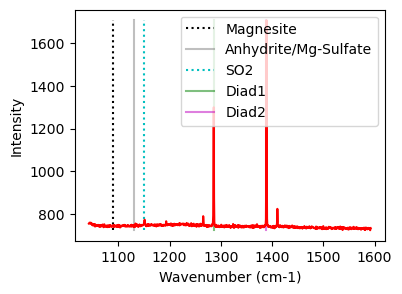

In [7]:
print(GroupN_df['filename'].iloc[i])
plot1=pf.plot_diad(path=spectra_path, filename=Diad_Files[i], filetype=filetype)

## Now lets inspect the diads and get their approximate positions
- As with generic peak, you can exclude 2 segments (e.g. around cosmic rays)
- You then specify how many peaks you want to fit on each diad. 1 means just the strong peak, 2 hotbands, and 3 for Diad2 would also fit the C13 peak if present. 
- The identify_diad_peaks then uses scipy findpeaks to identify the positions of the 2 diads, and any other peaks the user asks for. These are saved, and fed into the later functions for peak fitting. 

## Choose a model for fitting all peaks
- Option of Voigt or PseudoVoigt. We recomend PsuedoVoigt

In [8]:
model_name='PseudoVoigtModel'

## Fit Diad 1
- Tweak the parameters in the config files for each group. E.g. how many peaks (fit_peaks), the background positions, the sigma of the diad, and whether or not you want a gaussian background

In [9]:
diad_id_config=pf.diad_id_config(height=50, exclude_range1=[1308, 1309])
diad_id_config

if batch=='Weak':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=1,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250),
    upper_bck_diad1=(1300, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Medium':
    diad1_fit_config_init=pf.diad1_fit_config(
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=100, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
    diad1_fit_config_init

if batch=='Strong':
    diad1_fit_config_init=pf.diad1_fit_config(
    fit_gauss=True, gauss_amp= 2*GroupN_df['HB1_abs_prom'].iloc[i],
    model_name=model_name, fit_peaks=2,
    N_poly_bck_diad1=1, lower_bck_diad1=(1180, 1220),
    upper_bck_diad1=(1330, 1350),
    diad_sigma=0.6,
    x_range_residual=10, x_range_baseline=30, 
     y_range_baseline=1000, 
    HB_prom=GroupN_df['HB1_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i])
diad1_fit_config_init

diad1_fit_config(model_name='PseudoVoigtModel', fit_peaks=1, N_poly_bck_diad1=2, lower_bck_diad1=(1180, 1250), upper_bck_diad1=(1300, 1350), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=564.1424998568107, HB_prom=40.47033283250346, x_range_baseline=30, y_range_baseline=100, dpi=200, x_range_residual=10, return_other_params=False)

### See what these fit parameters look like for diad1

Diad1_Combofit_Cent  Diad1_Voigt_Cent  Diad1_Voigt_Area  Diad1_Voigt_Sigma  \
0          1286.035114       1286.035114        607.861413           0.433738   

  Diad1_Voigt_Gamma  Diad1_Combofit_Height  Diad1_Residual  Diad1_Prop_Lor  \
0              None             592.273805        3.691376        0.309947   

   Diad1_fwhm        Diad1_refit  
0    0.867475  Flagged Warnings:

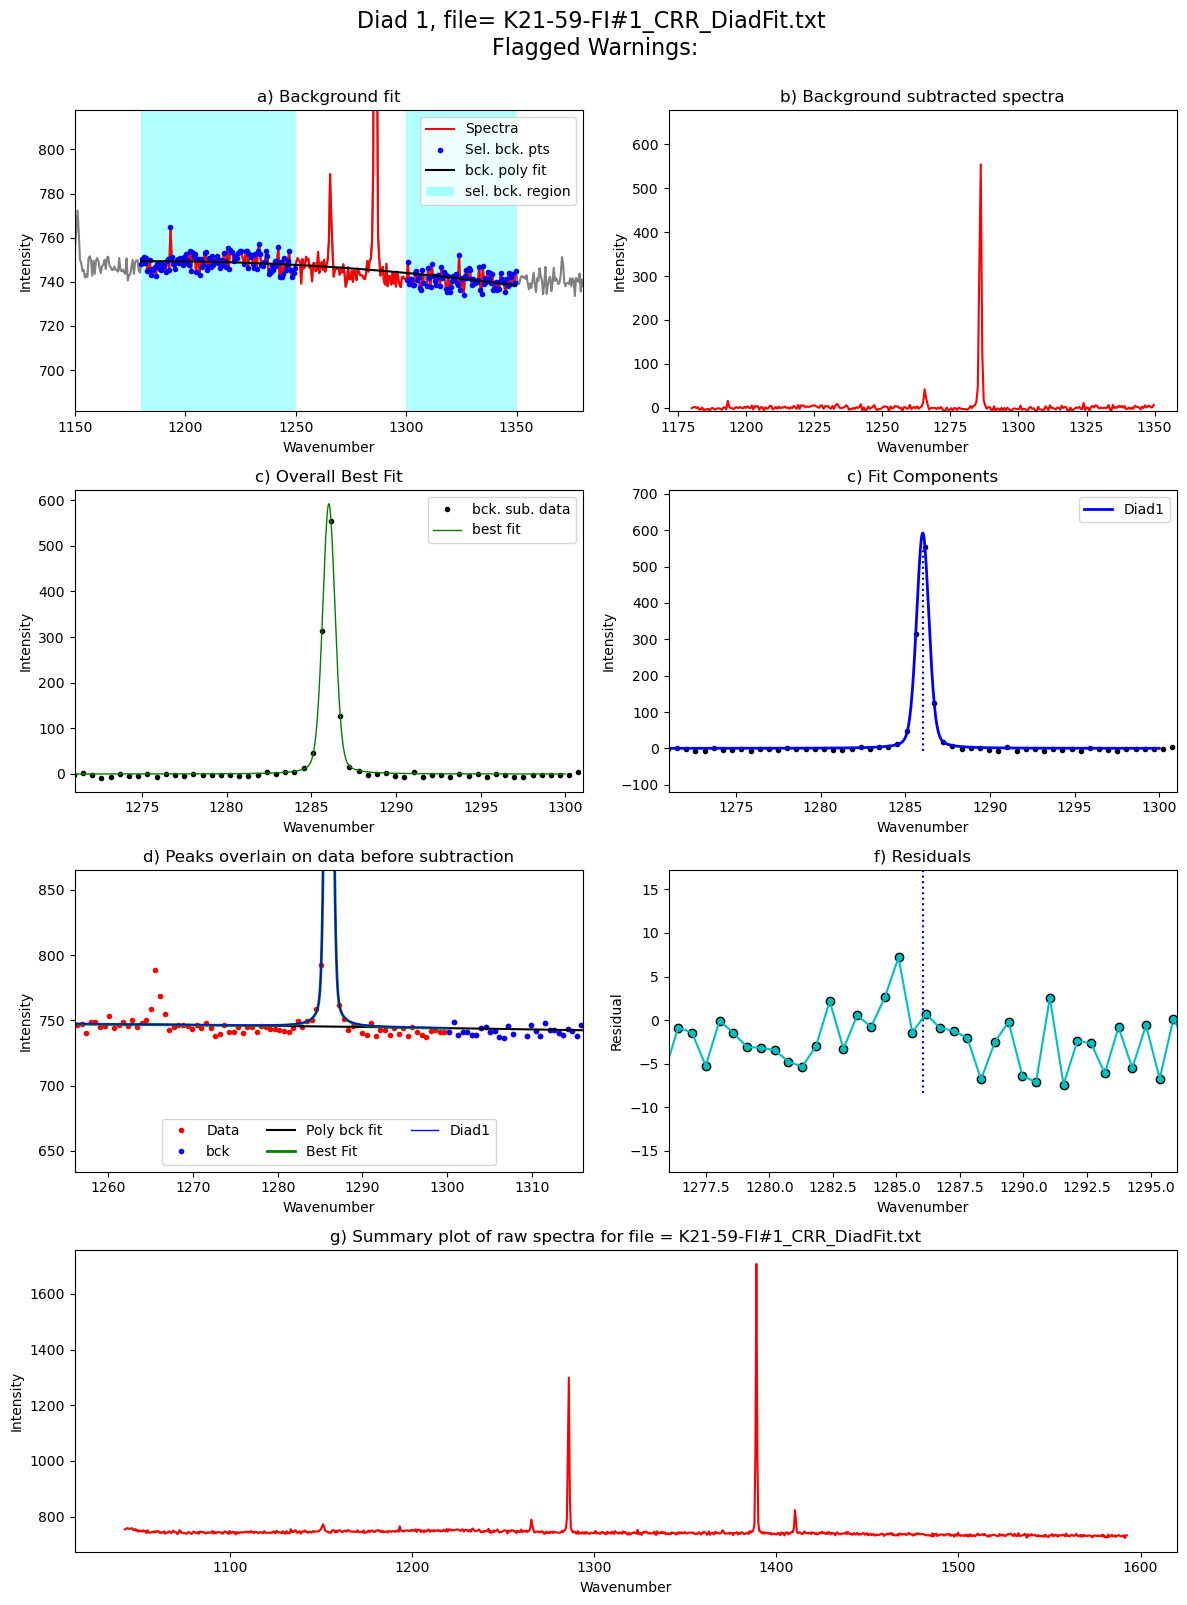

In [10]:
Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config_init,
config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i],
filetype=filetype, plot_figure=True, close_figure=False,
Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
HB_pos=GroupN_df['HB1_pos'].iloc[i])
Diad1_fit

### Update the sigma
- The sigma parameter varies quite a lot based on the splitting. Best to update your first guess with what you found for the example file above

In [11]:
diad1_fit_config2=diad1_fit_config_init
diad1_fit_config2.diad_sigma=Diad1_fit['Diad1_Voigt_Sigma'][0]

## Fit diad2

In [12]:
if batch=='Weak':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=1, upper_bck_diad2=(1430, 1480),
    lower_bck_diad2=(1310, 1360), diad_sigma=0.6,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Medium':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3,
    lower_bck_diad2=(1310, 1350), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=100,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init

if batch=='Strong':
    diad2_fit_config_init=pf.diad2_fit_config(model_name=model_name,
    fit_peaks=3, fit_gauss=True, gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i],
    lower_bck_diad2=(1310, 1340), diad_sigma=1,  N_poly_bck_diad2=2,                                       
    x_range_residual=30, y_range_baseline=1000,  
    x_range_baseline=30,
    HB_prom=GroupN_df['HB2_abs_prom'].iloc[i], 
    diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i],
    C13_prom=GroupN_df['C13_abs_prom'].iloc[i])
    diad2_fit_config_init
diad2_fit_config_init

diad2_fit_config(model_name='PseudoVoigtModel', fit_peaks=1, N_poly_bck_diad2=2, lower_bck_diad2=(1310, 1360), upper_bck_diad2=(1430, 1480), fit_gauss=False, gauss_amp=1000, diad_sigma=0.6, diad_sigma_min_allowance=0.2, diad_sigma_max_allowance=5, diad_prom=970.1456270068882, HB_prom=88.6107982307908, x_range_baseline=30, y_range_baseline=100, plot_figure=True, dpi=200, x_range_residual=30, return_other_params=False, C13_prom=10)

### See what these fit parameters look like for diad2

Diad2_Combofit_Cent  Diad2_Voigt_Cent  Diad2_Voigt_Area  Diad2_Voigt_Sigma  \
0          1389.093353       1389.093353        904.347013           0.395498   

  Diad2_Voigt_Gamma  Diad2_Combofit_Height  Diad2_Residual  Diad2_Prop_Lor  \
0              None             968.208769        3.743551        0.307895   

   Diad2_fwhm        Diad2_refit  
0    0.790996  Flagged Warnings:

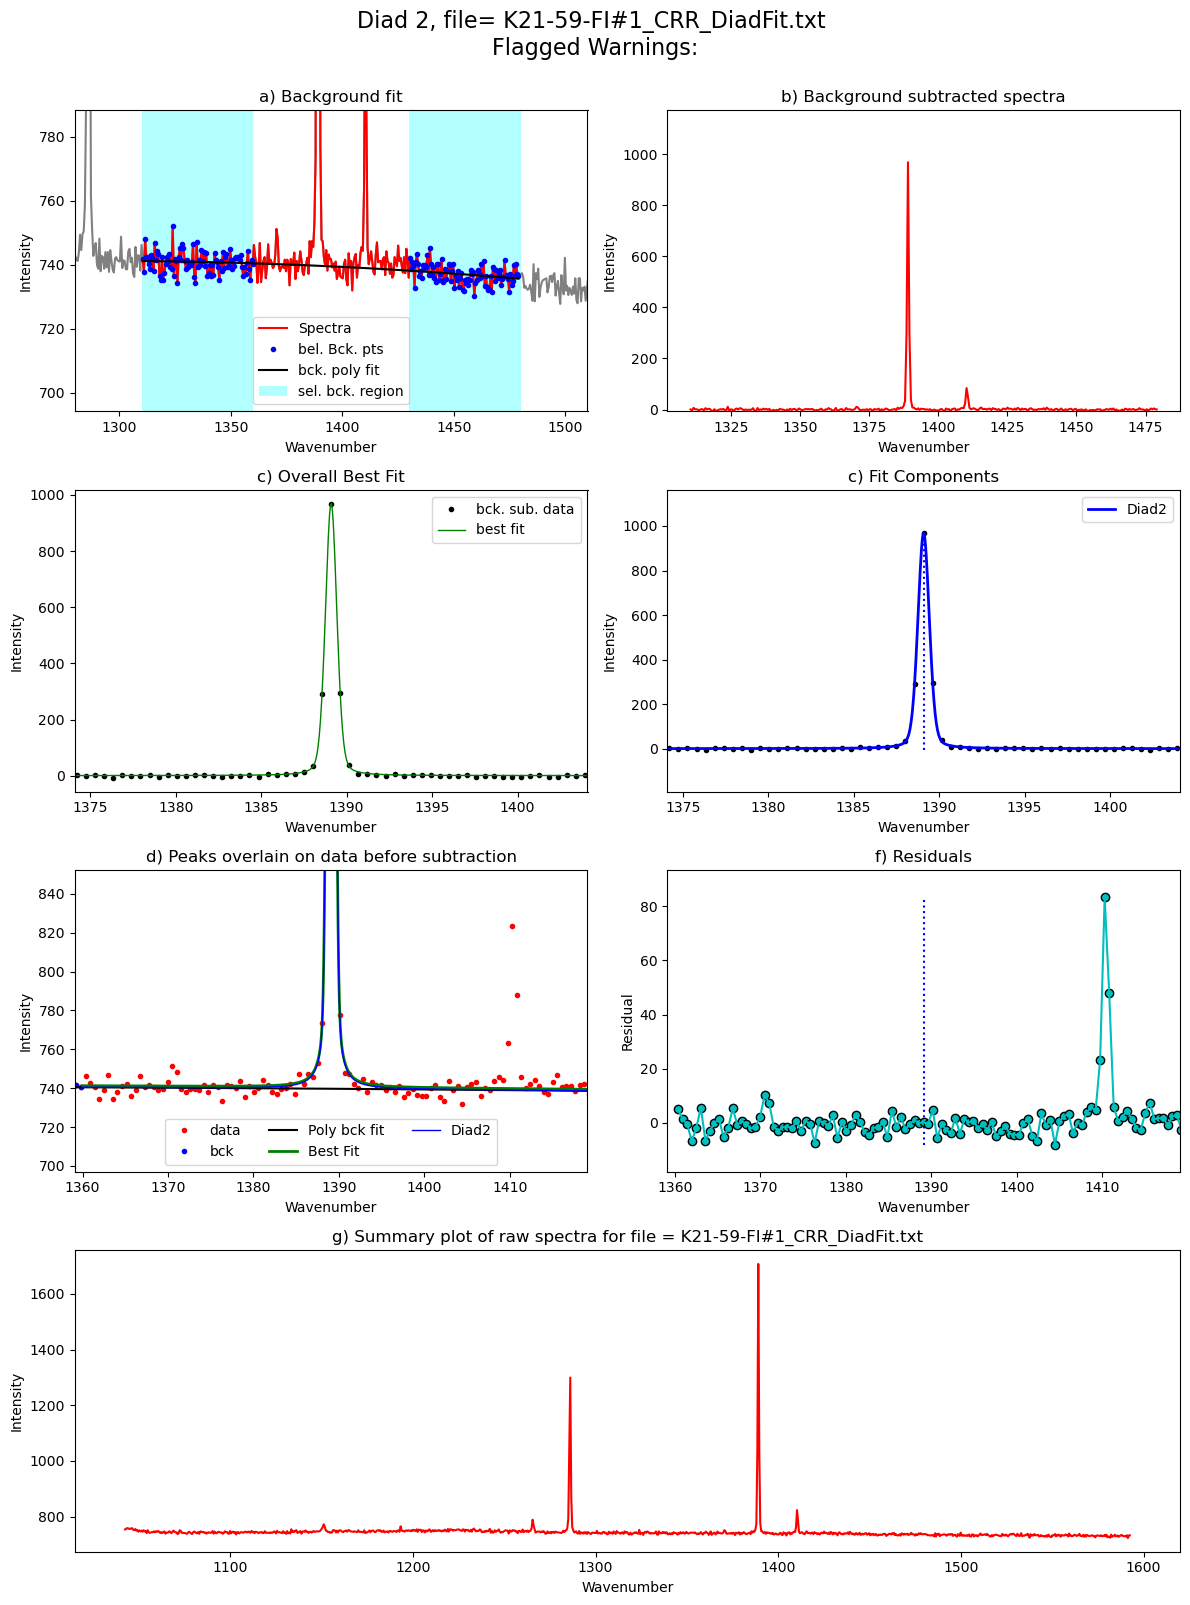

In [13]:
Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config_init,
    config2=diad_id_config,
path=spectra_path, filename=GroupN_df['filename'].iloc[i], filetype=filetype,
plot_figure=True, close_figure=False, 
Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
HB_pos=GroupN_df['HB2_pos'].iloc[i], 
C13_pos=GroupN_df['C13_pos'].iloc[i])
Diad2_fit.to_clipboard(excel=True)
Diad2_fit

### Update the sigma

In [14]:
diad2_fit_config2=diad2_fit_config_init
diad2_fit_config2.diad_sigma=Diad2_fit['Diad2_Voigt_Sigma'][0]
print(Diad2_fit['Diad2_Voigt_Sigma'][0])

0.39549788002876757


## Loop over all the files in the group
- This will loop over all the 

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:20<00:00,  2.56s/it]


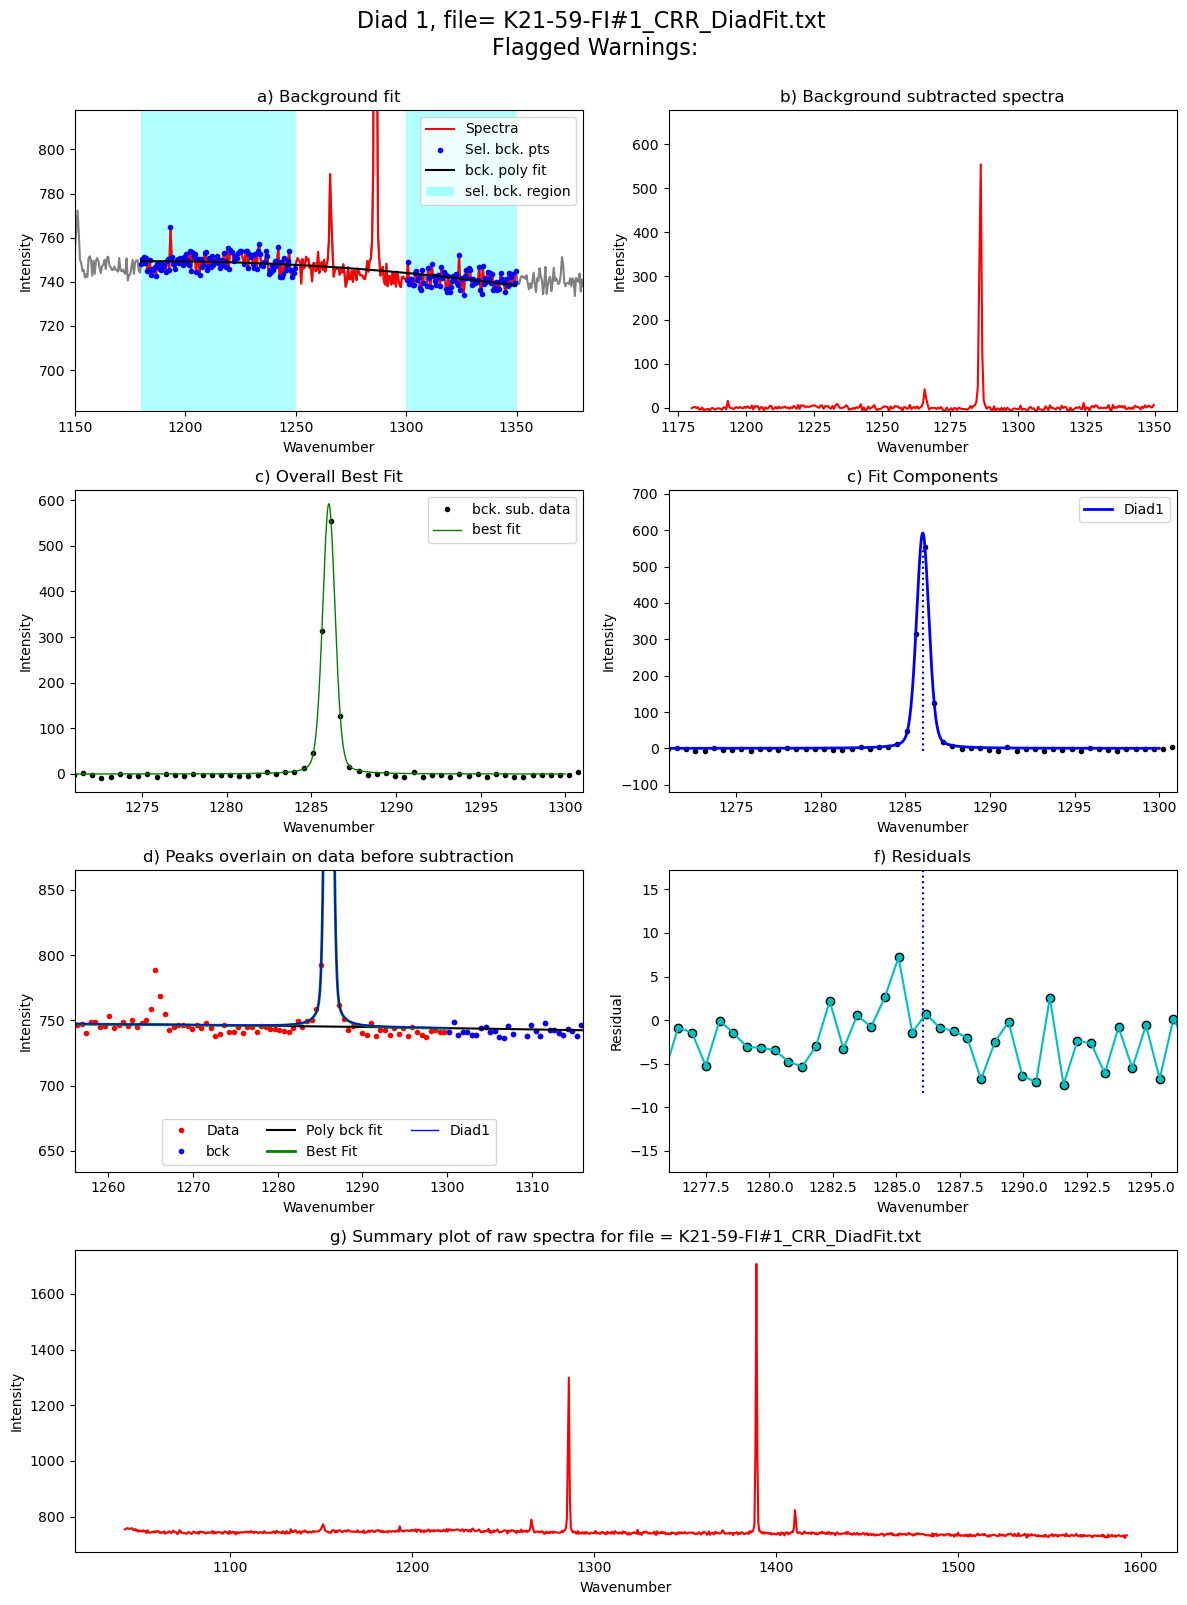

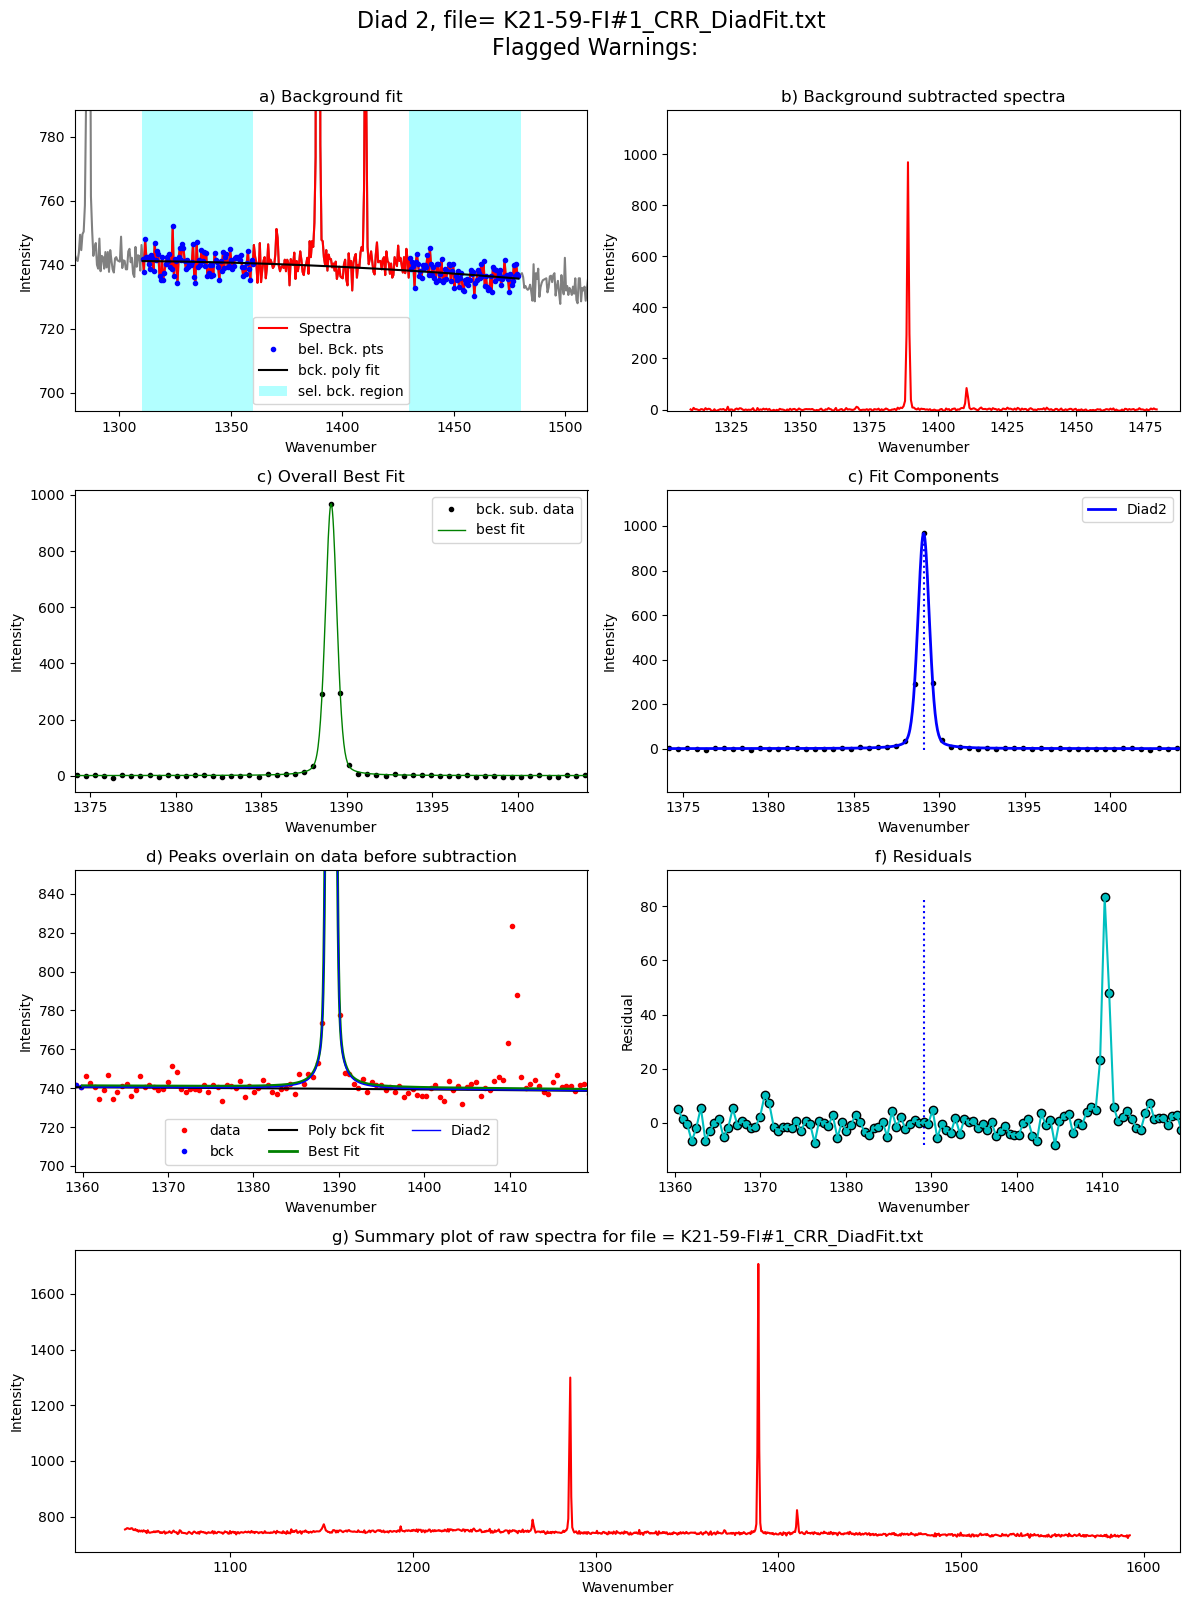

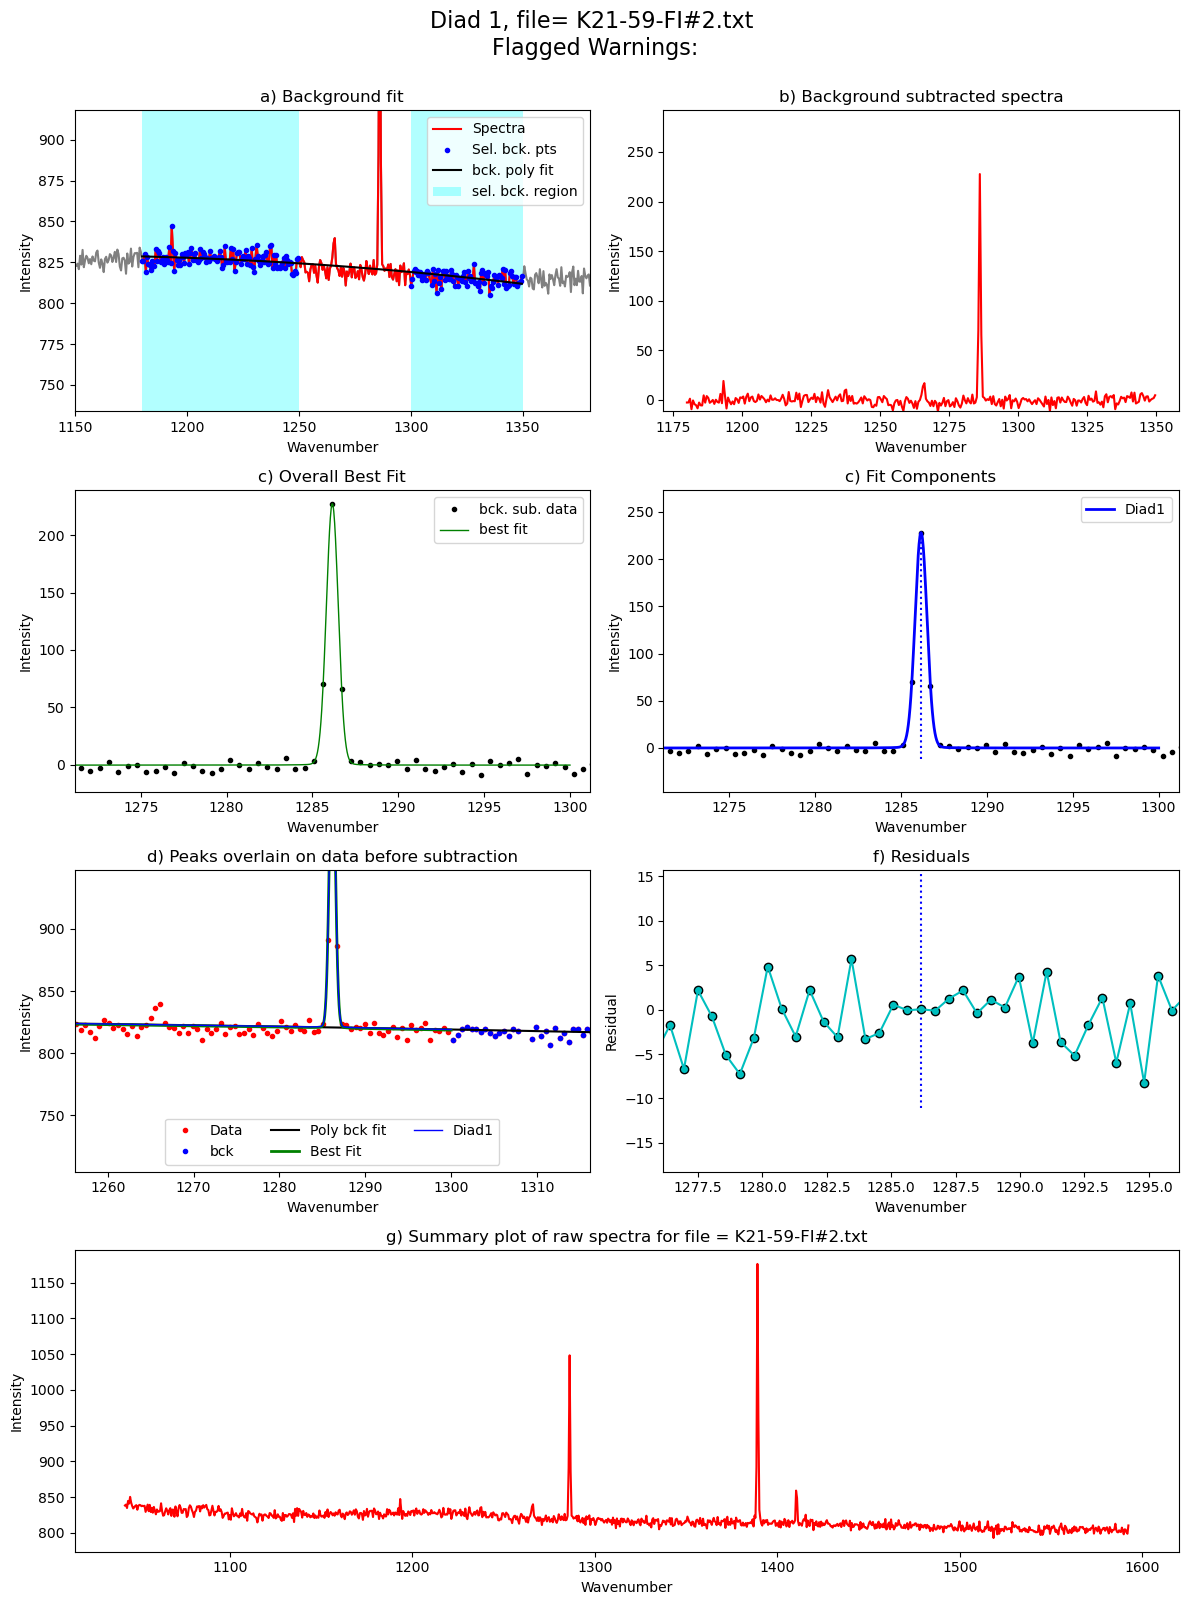

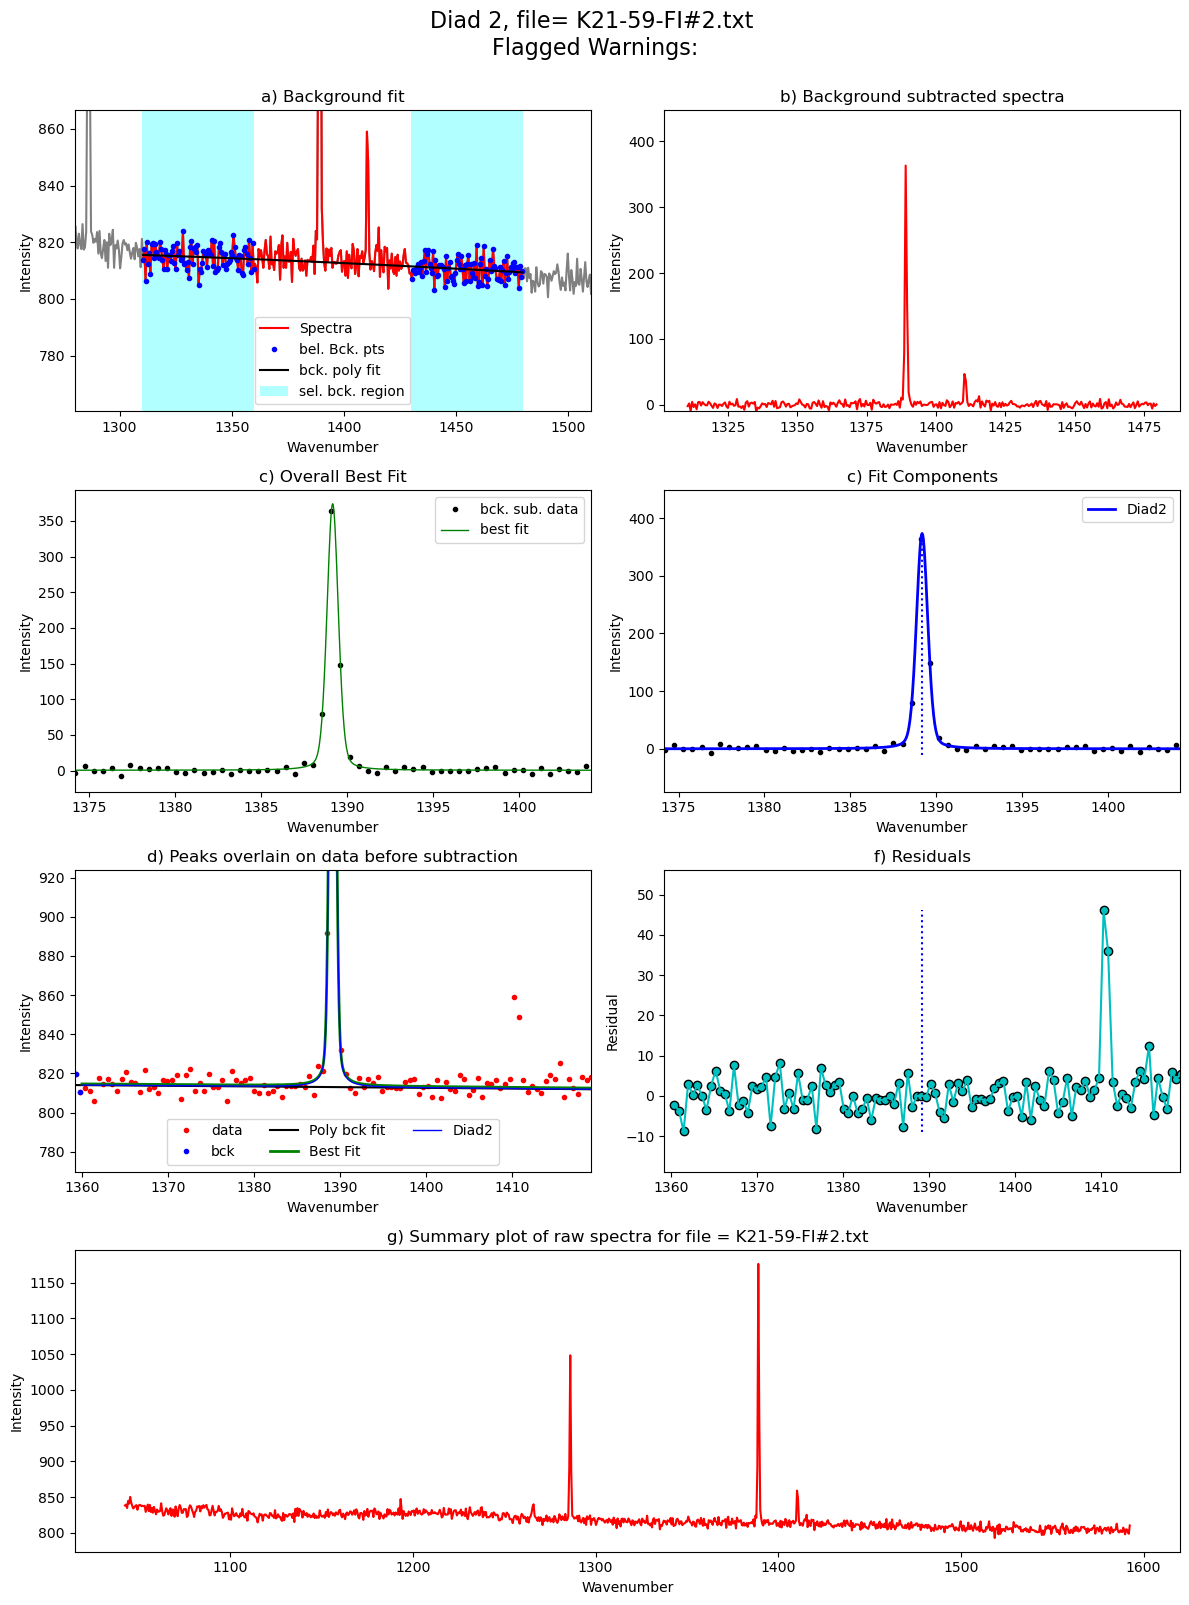

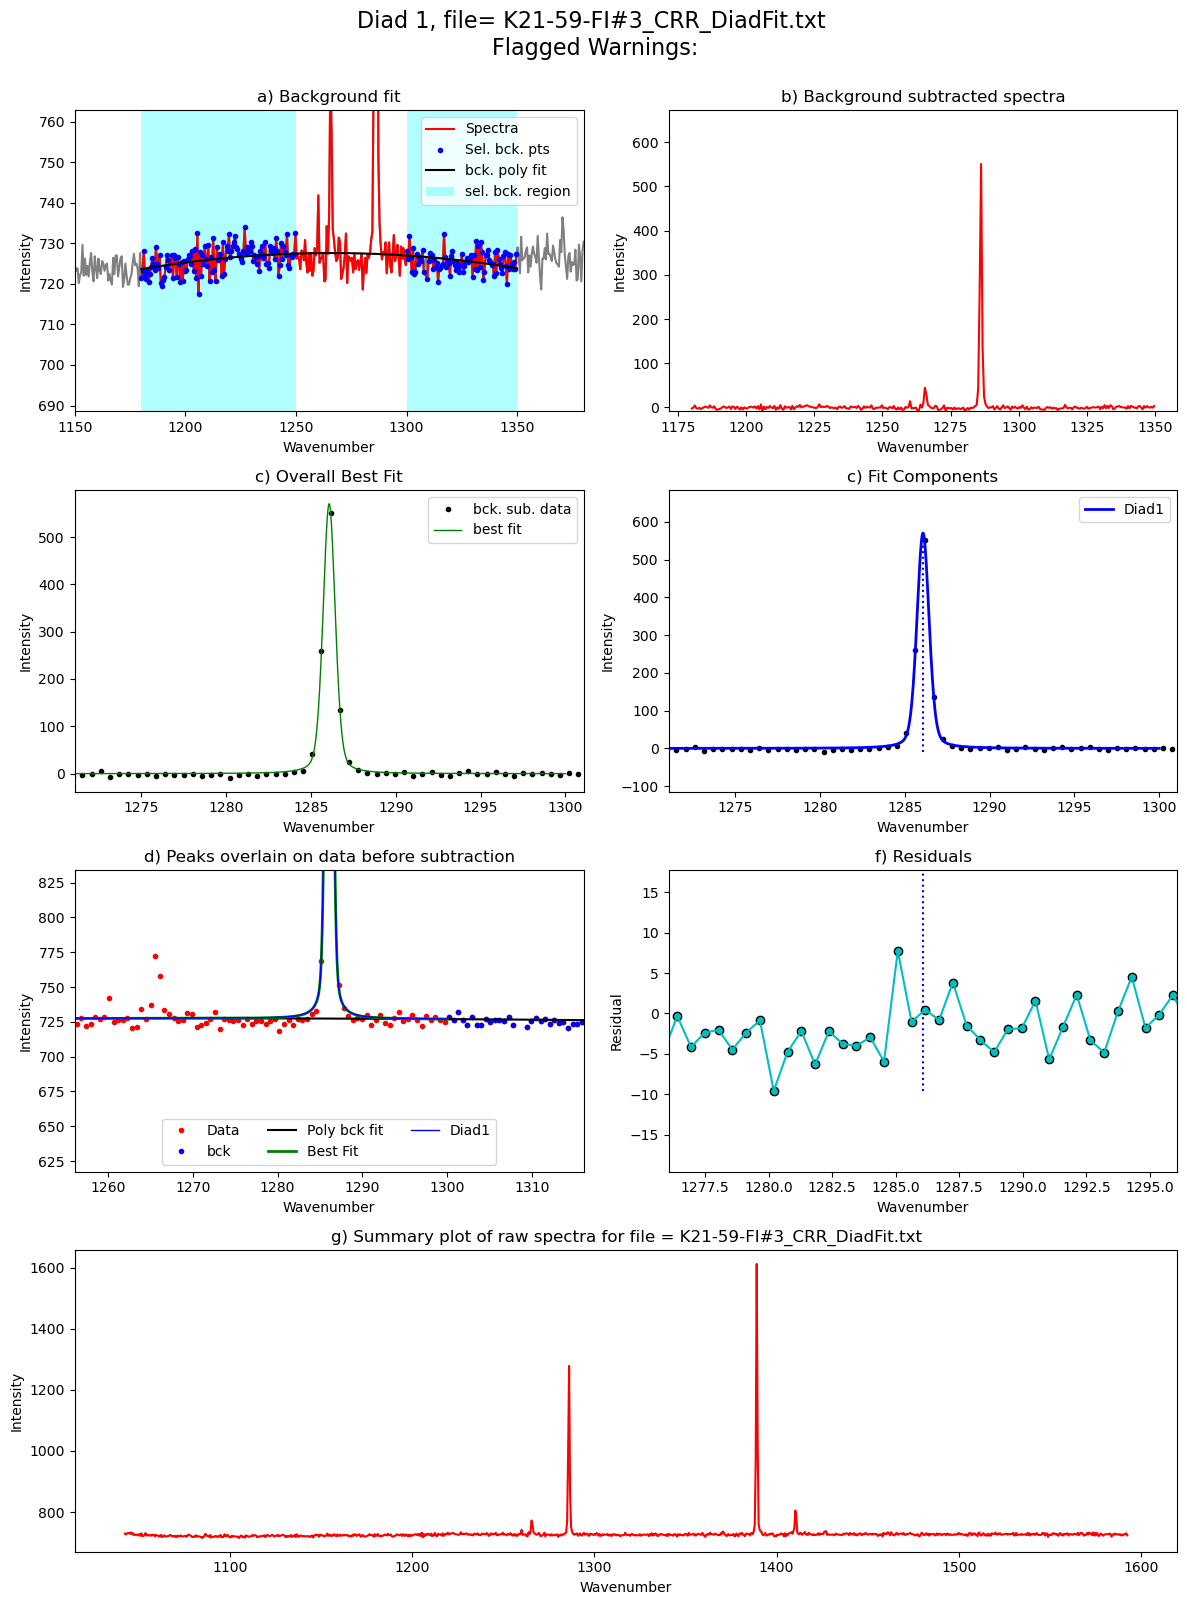

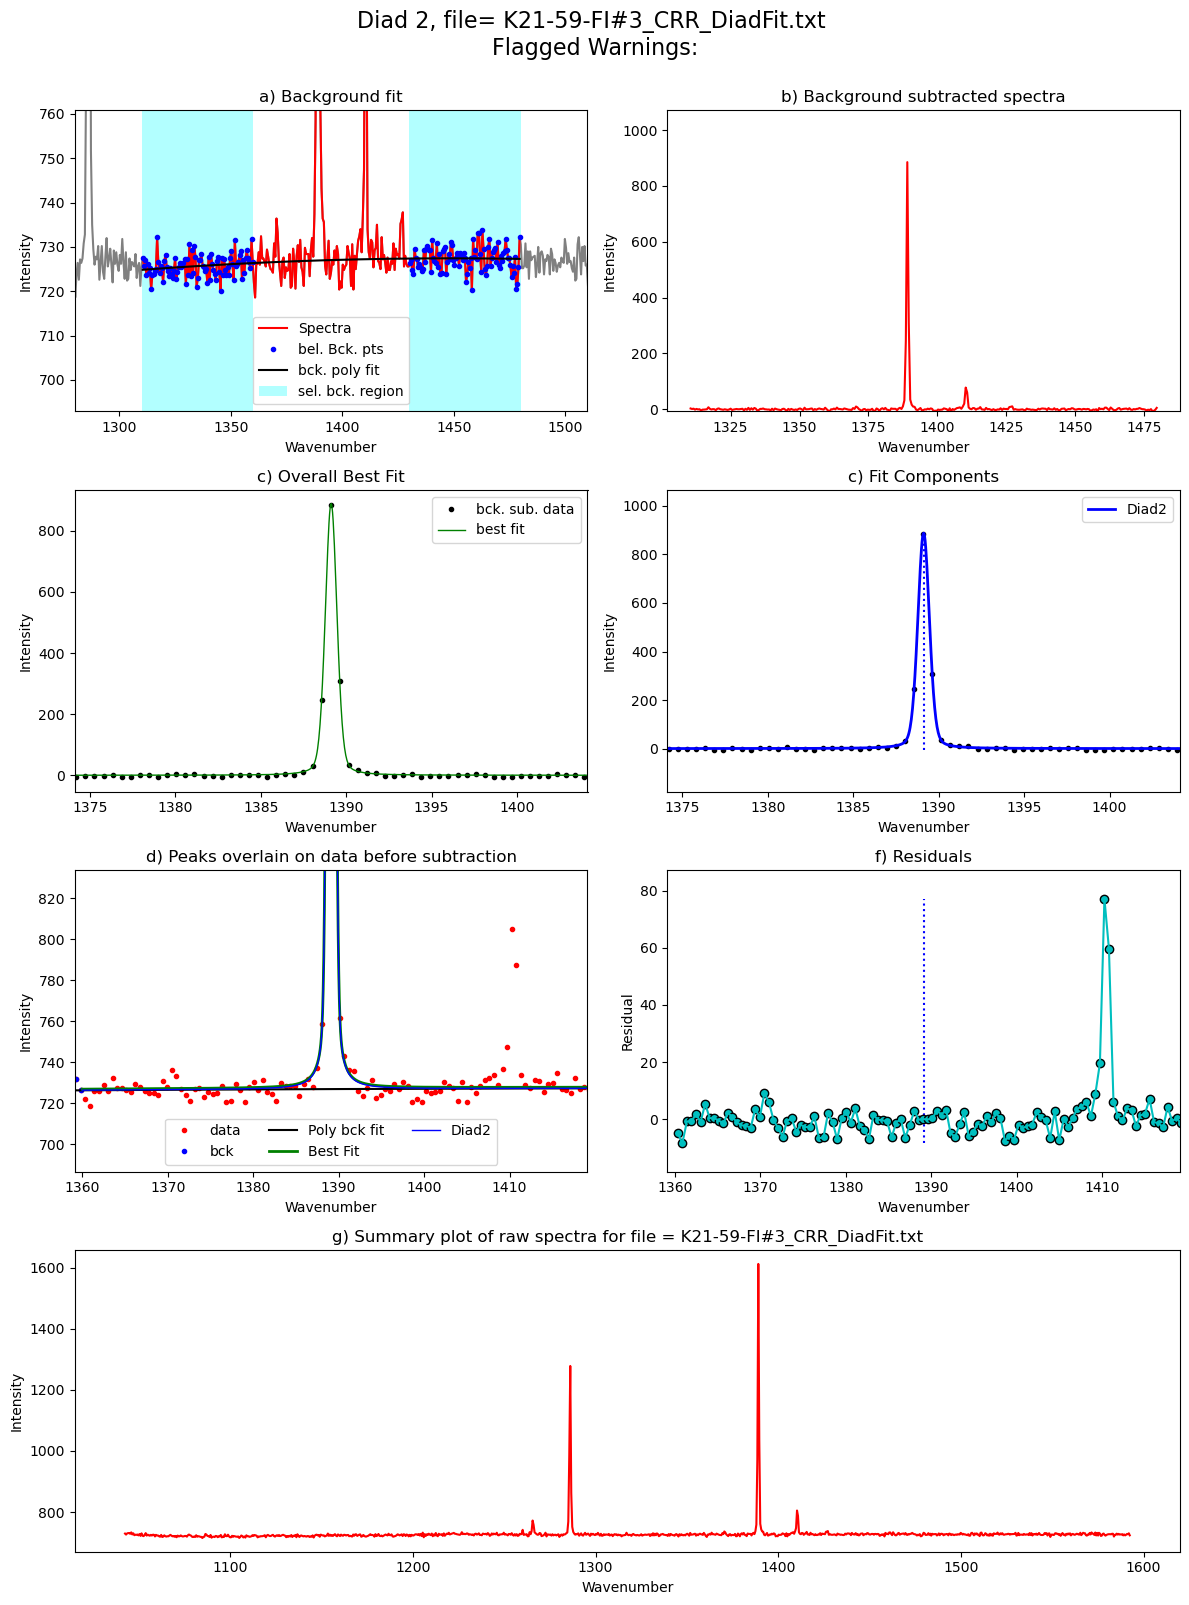

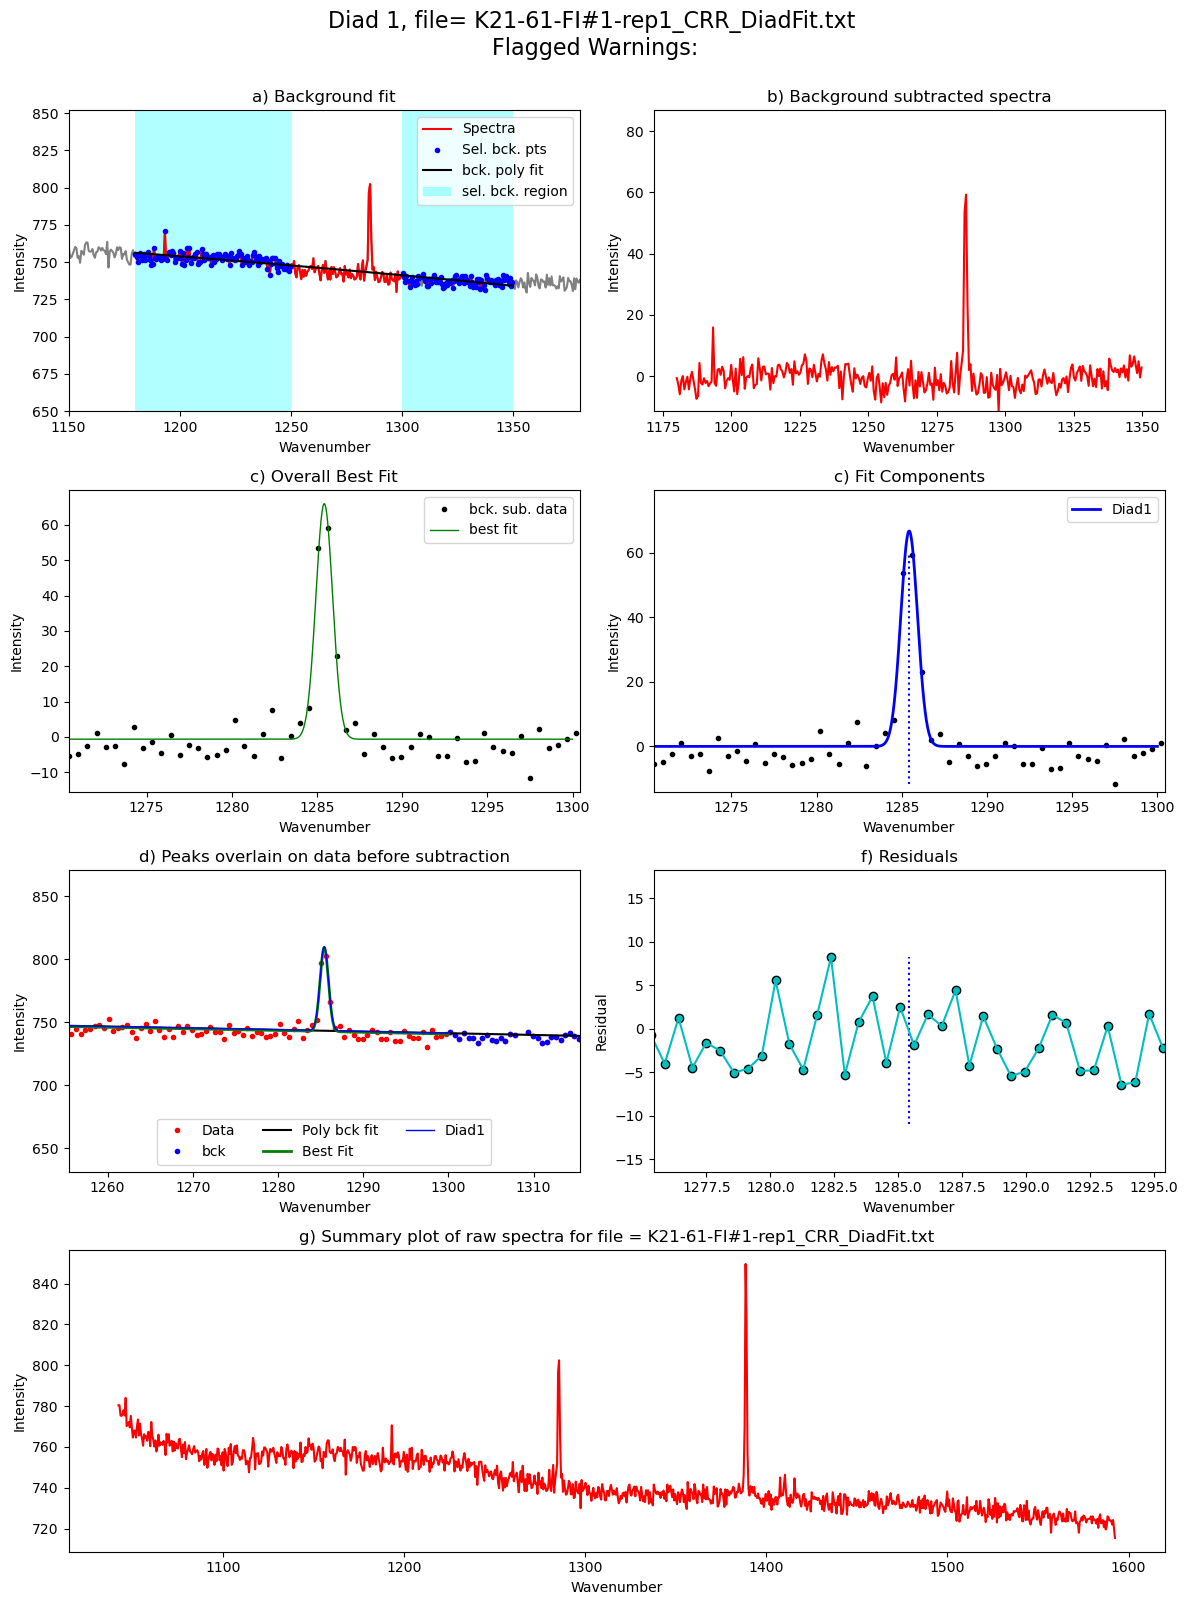

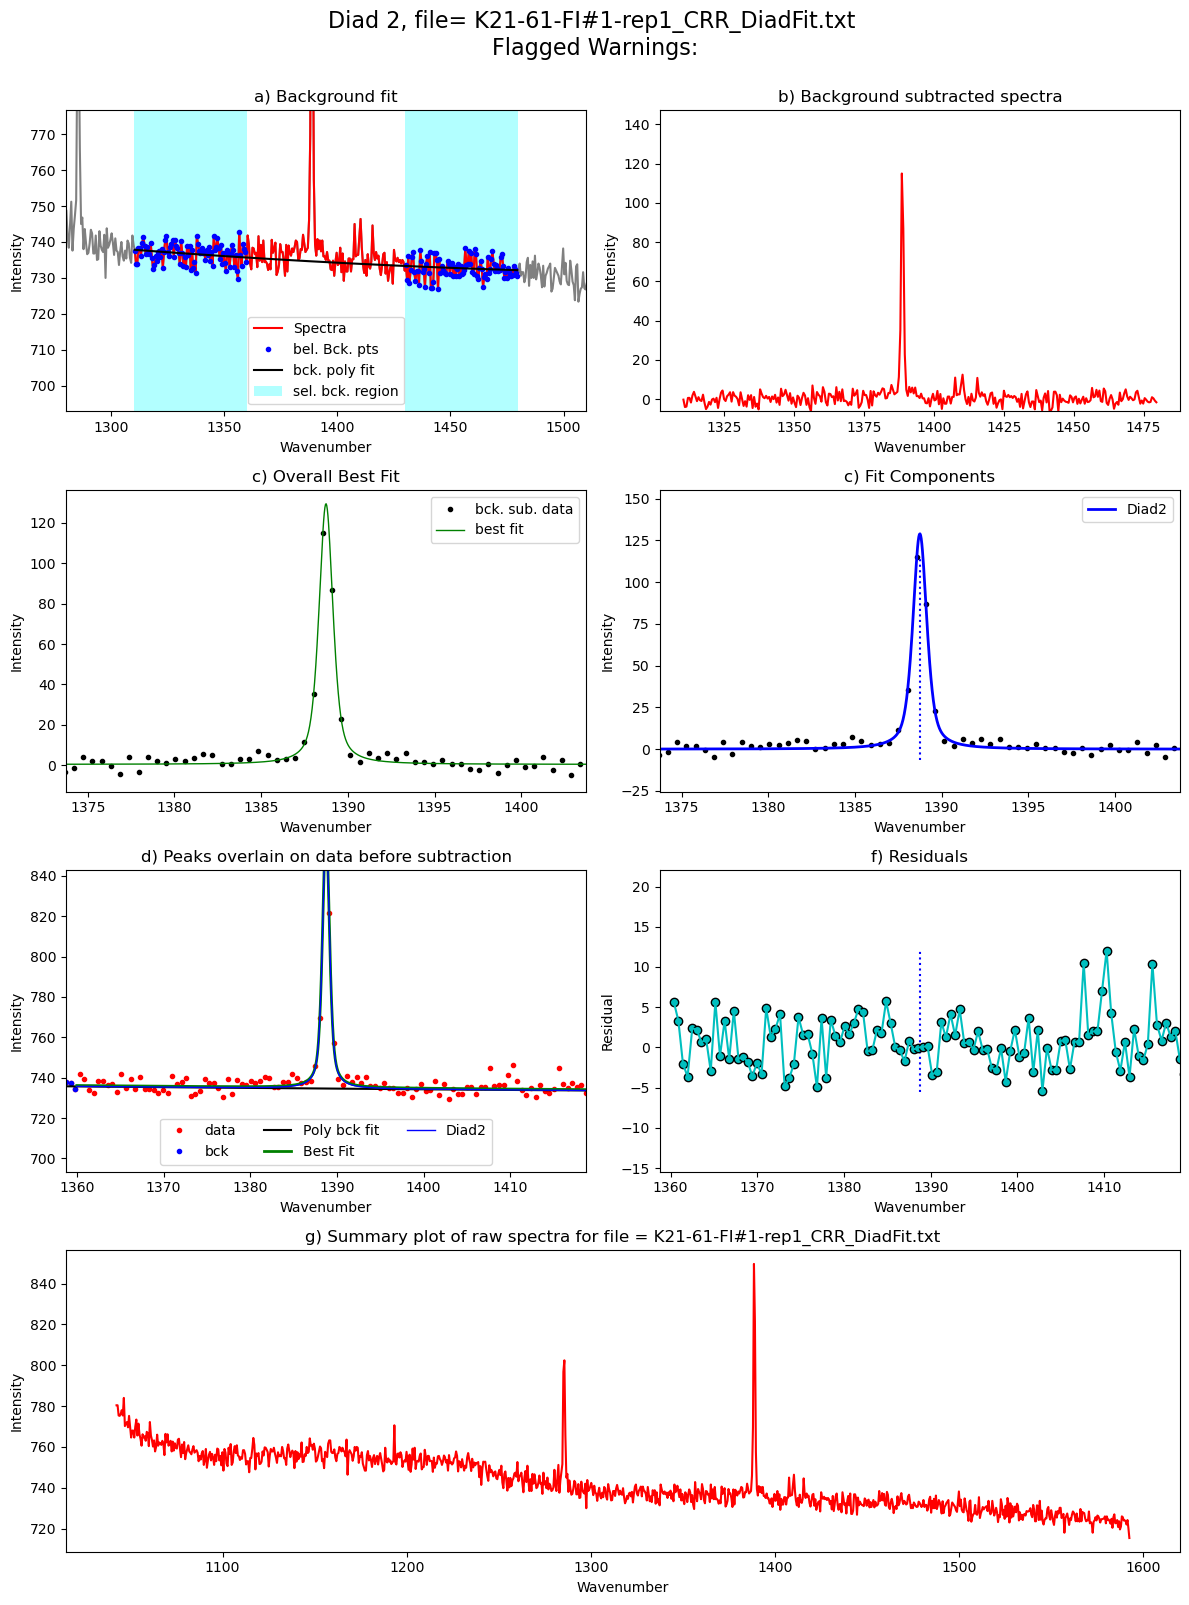

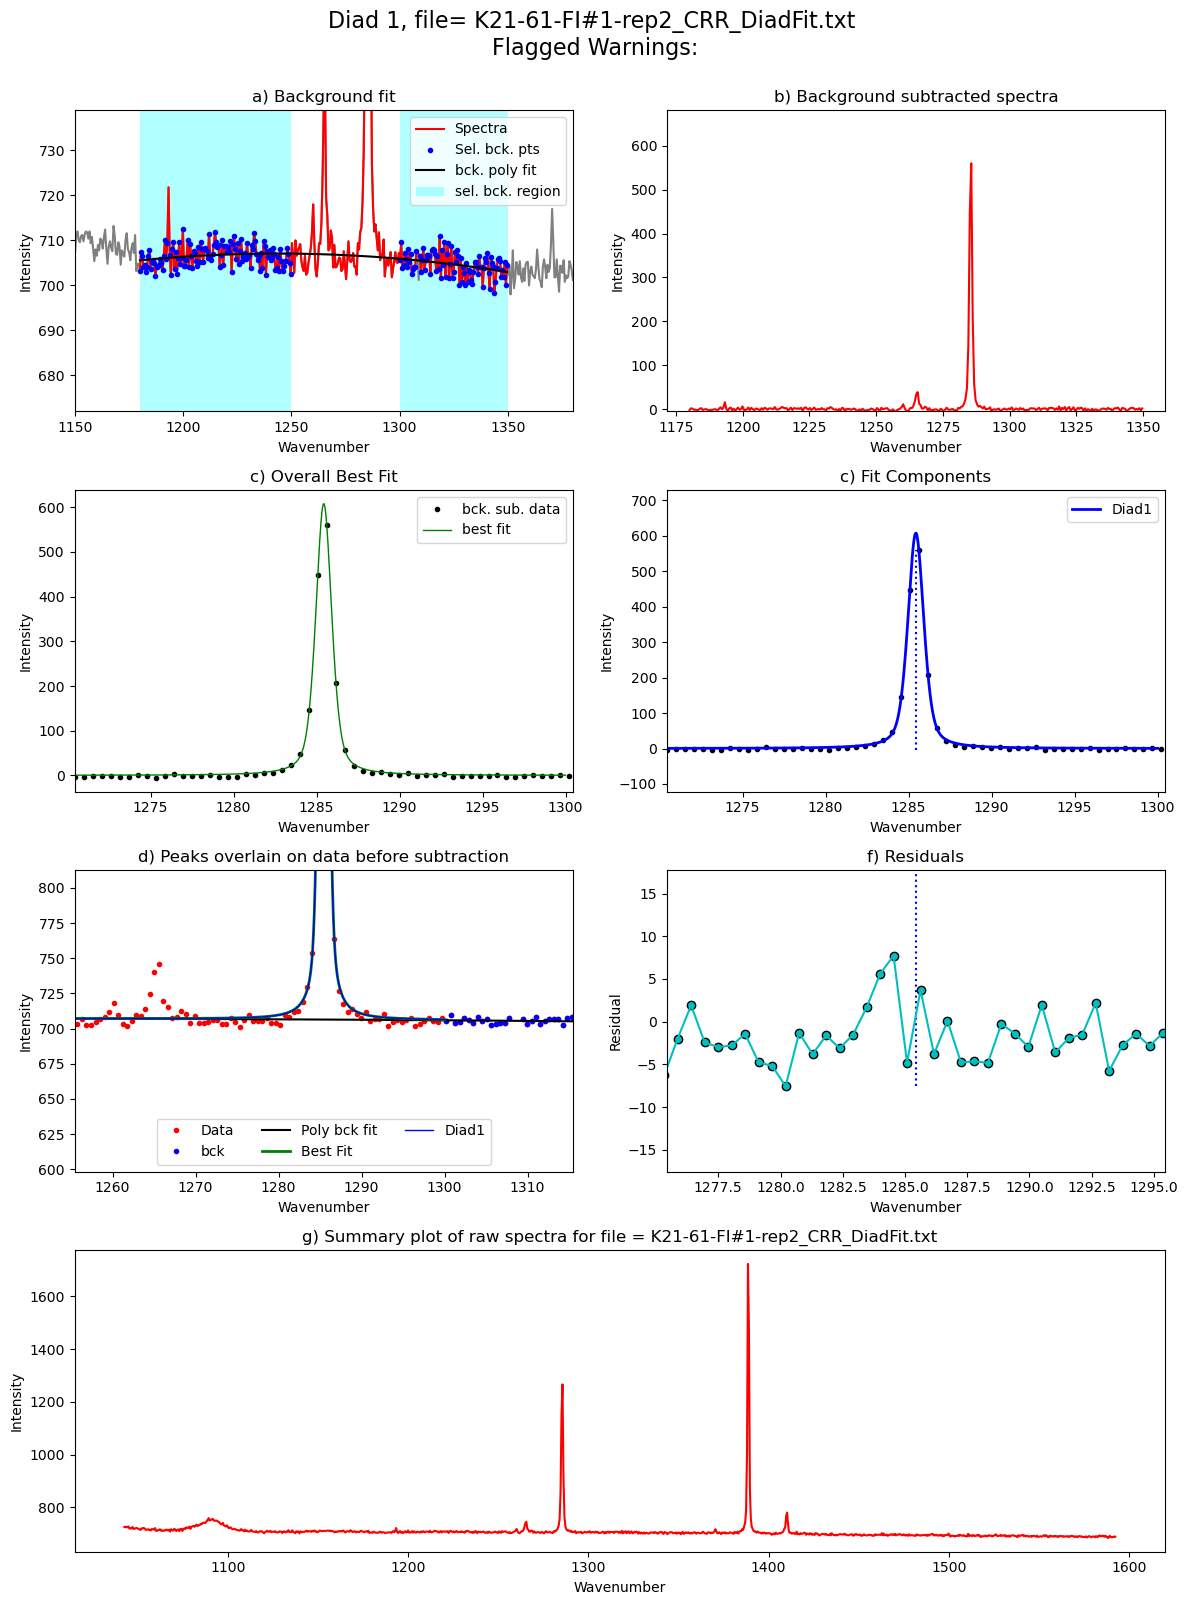

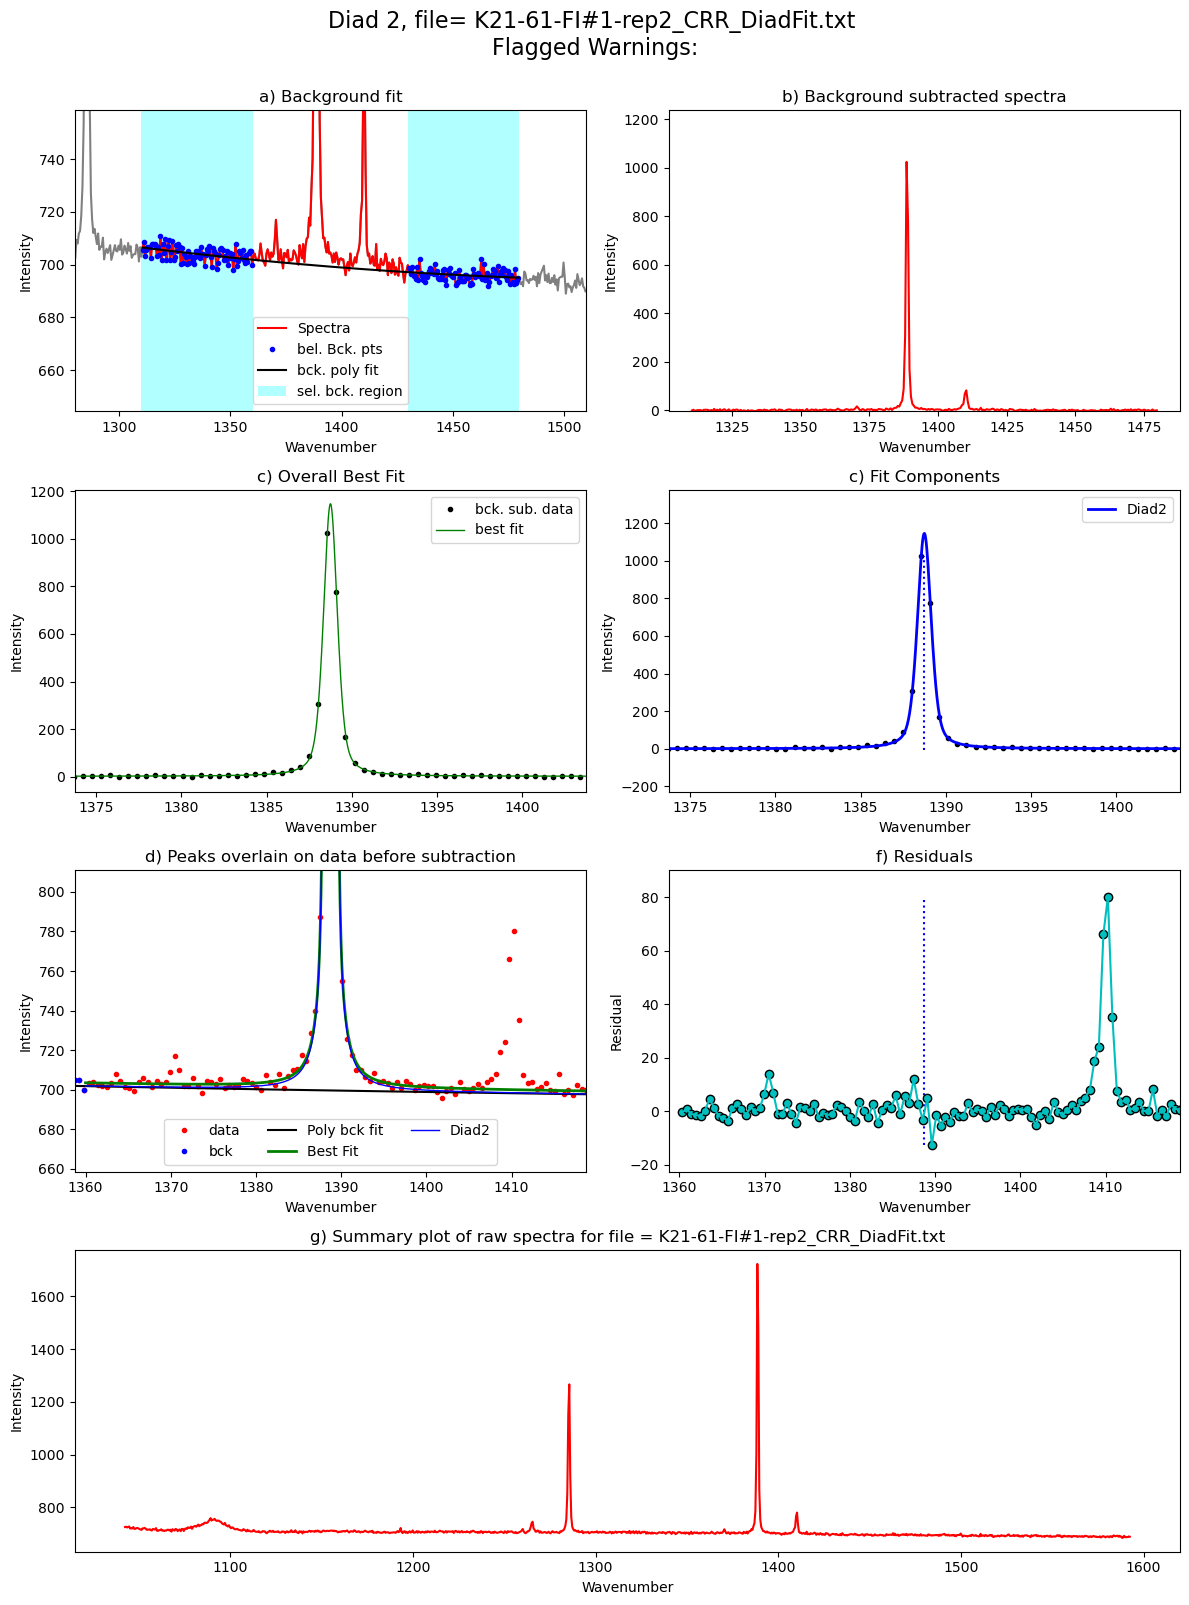

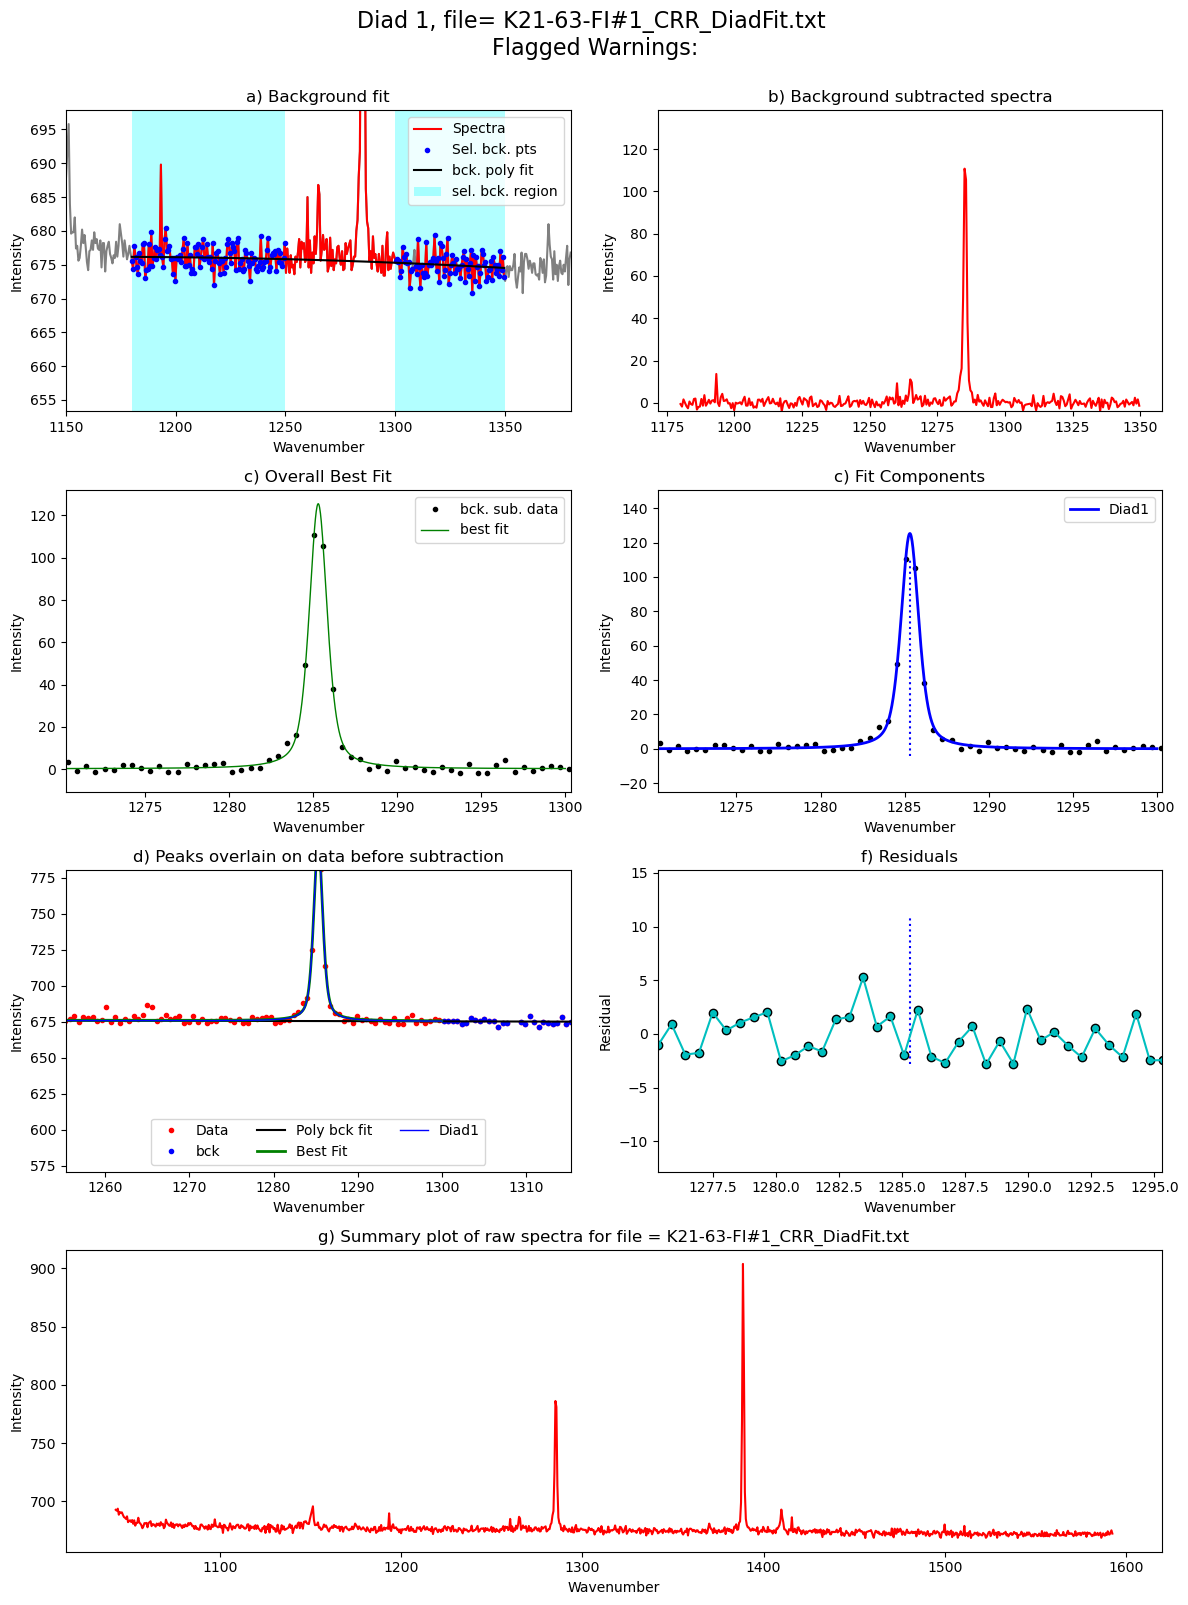

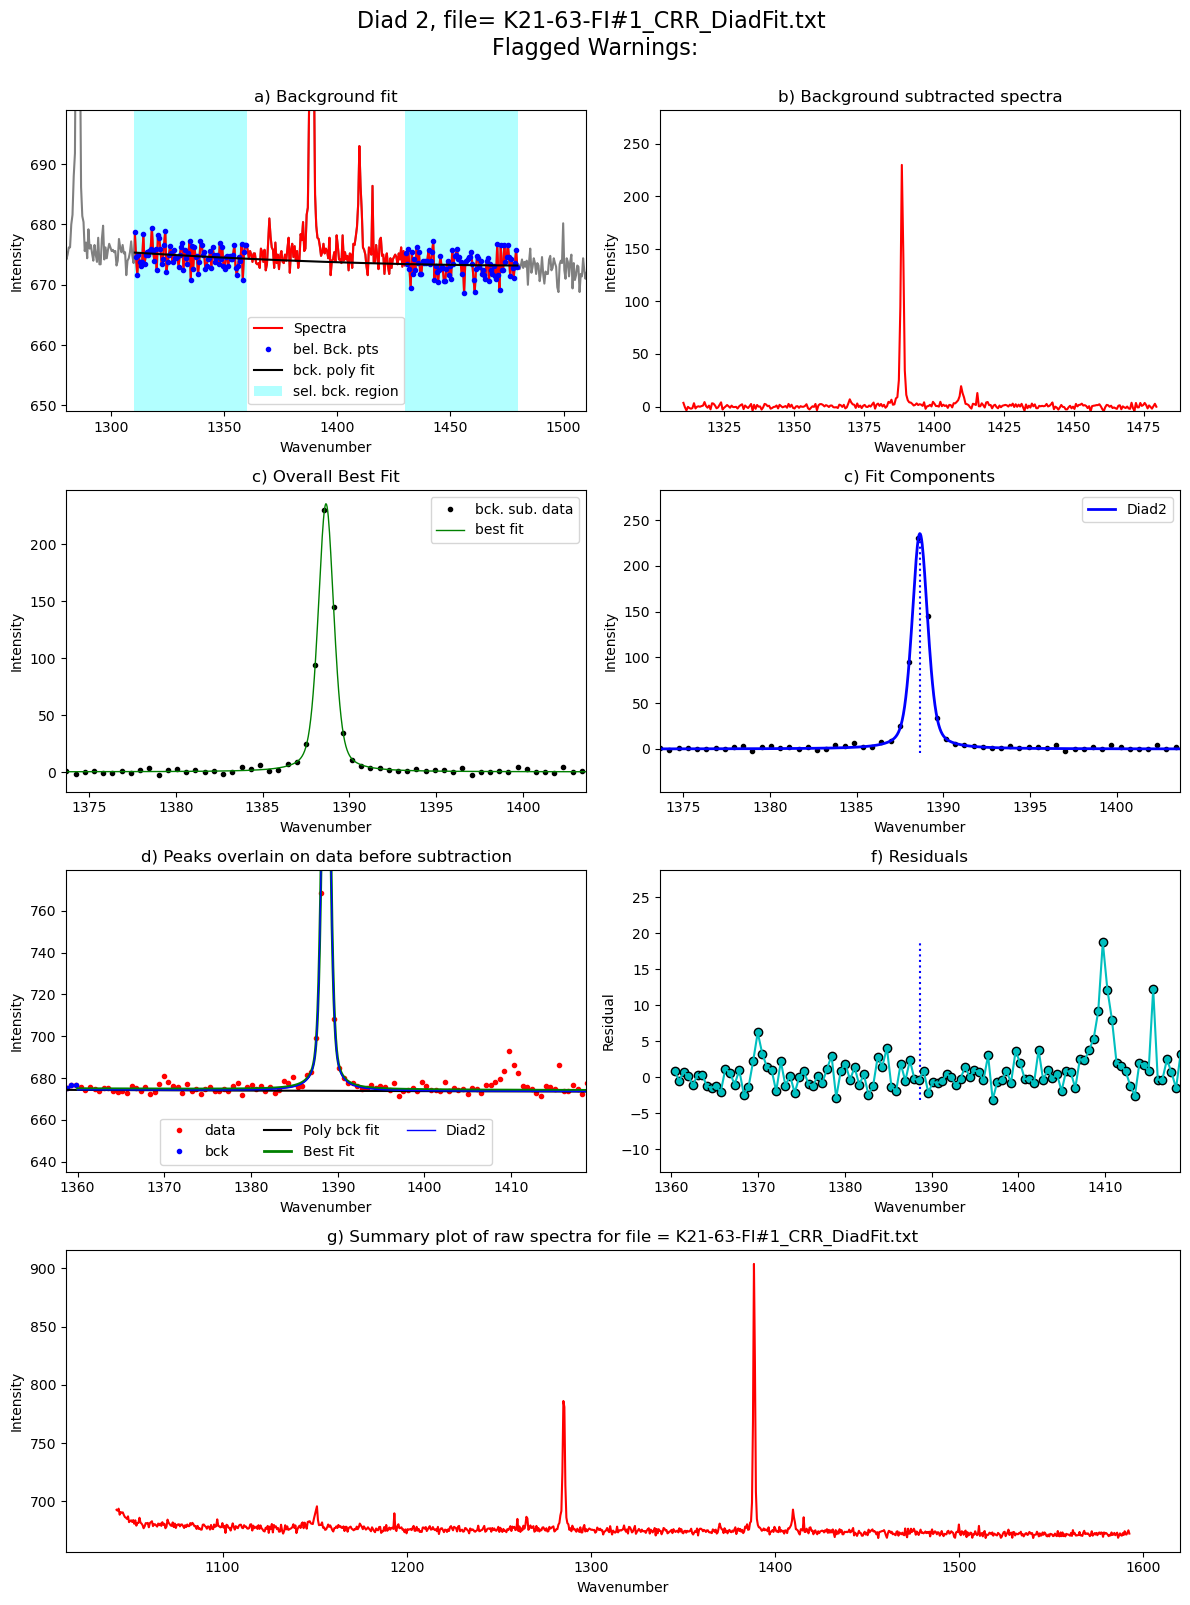

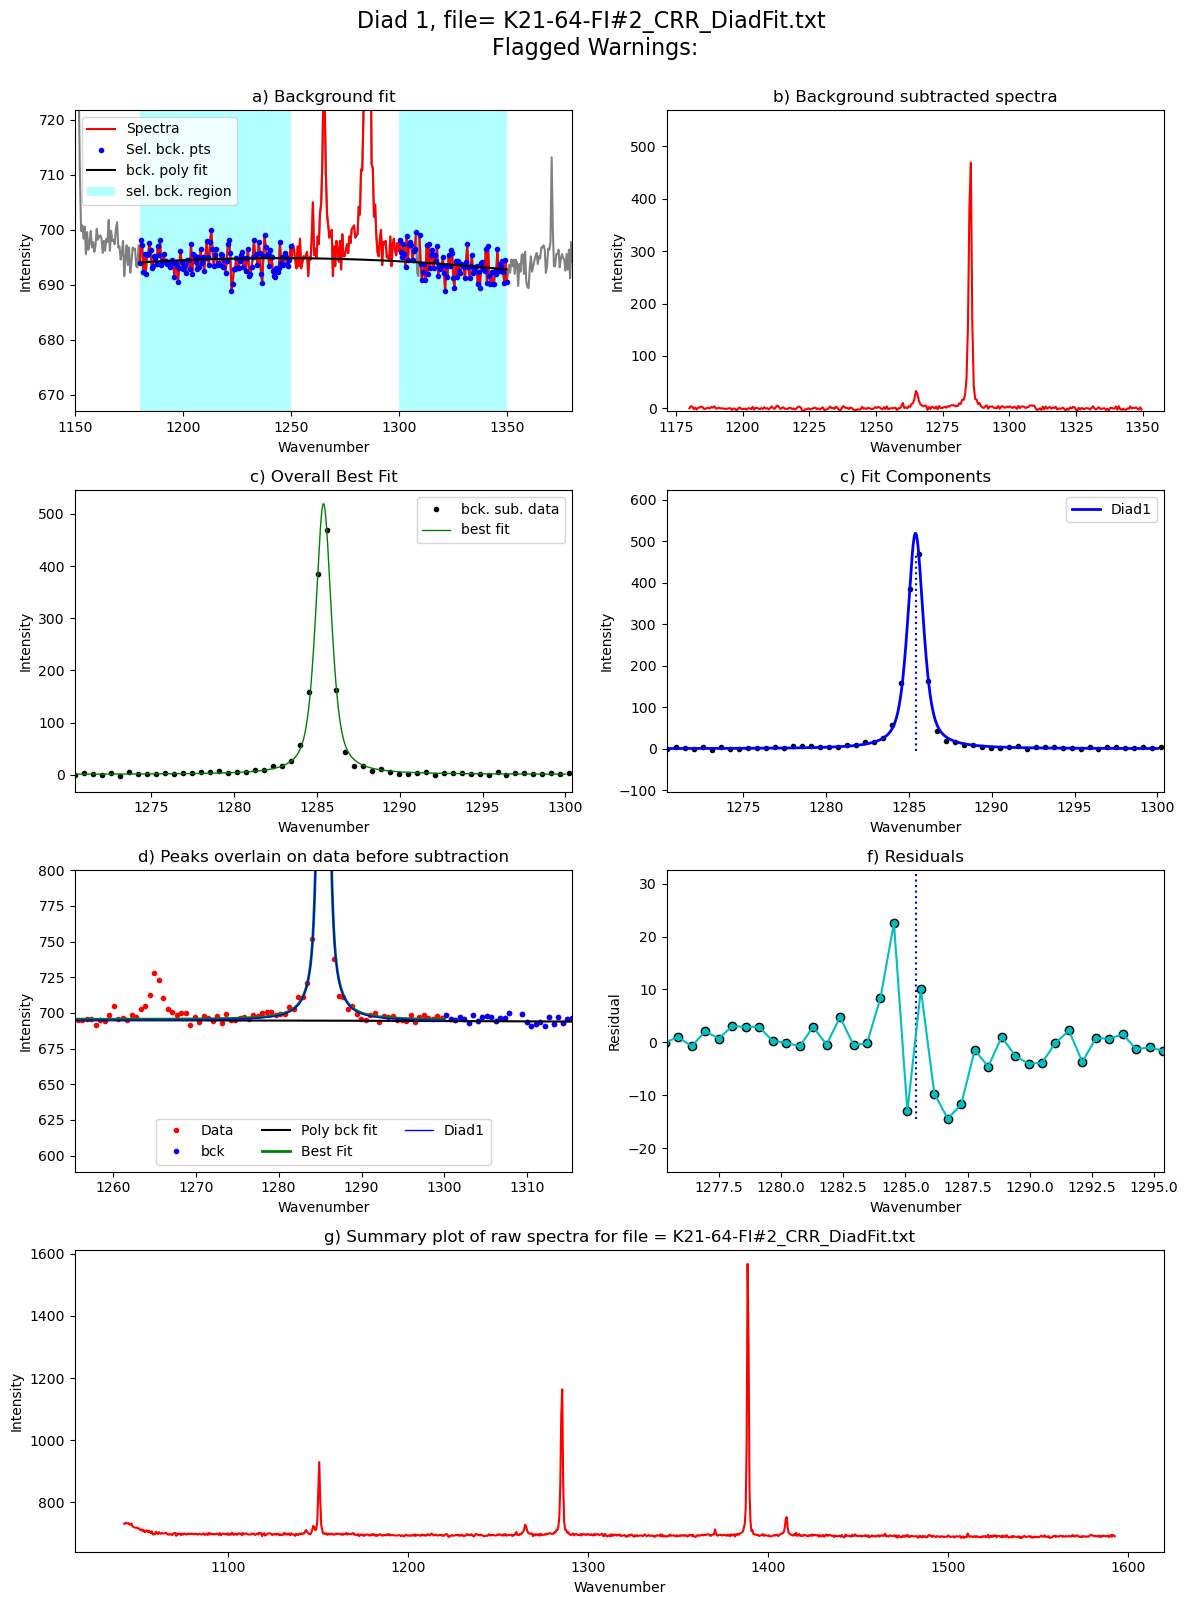

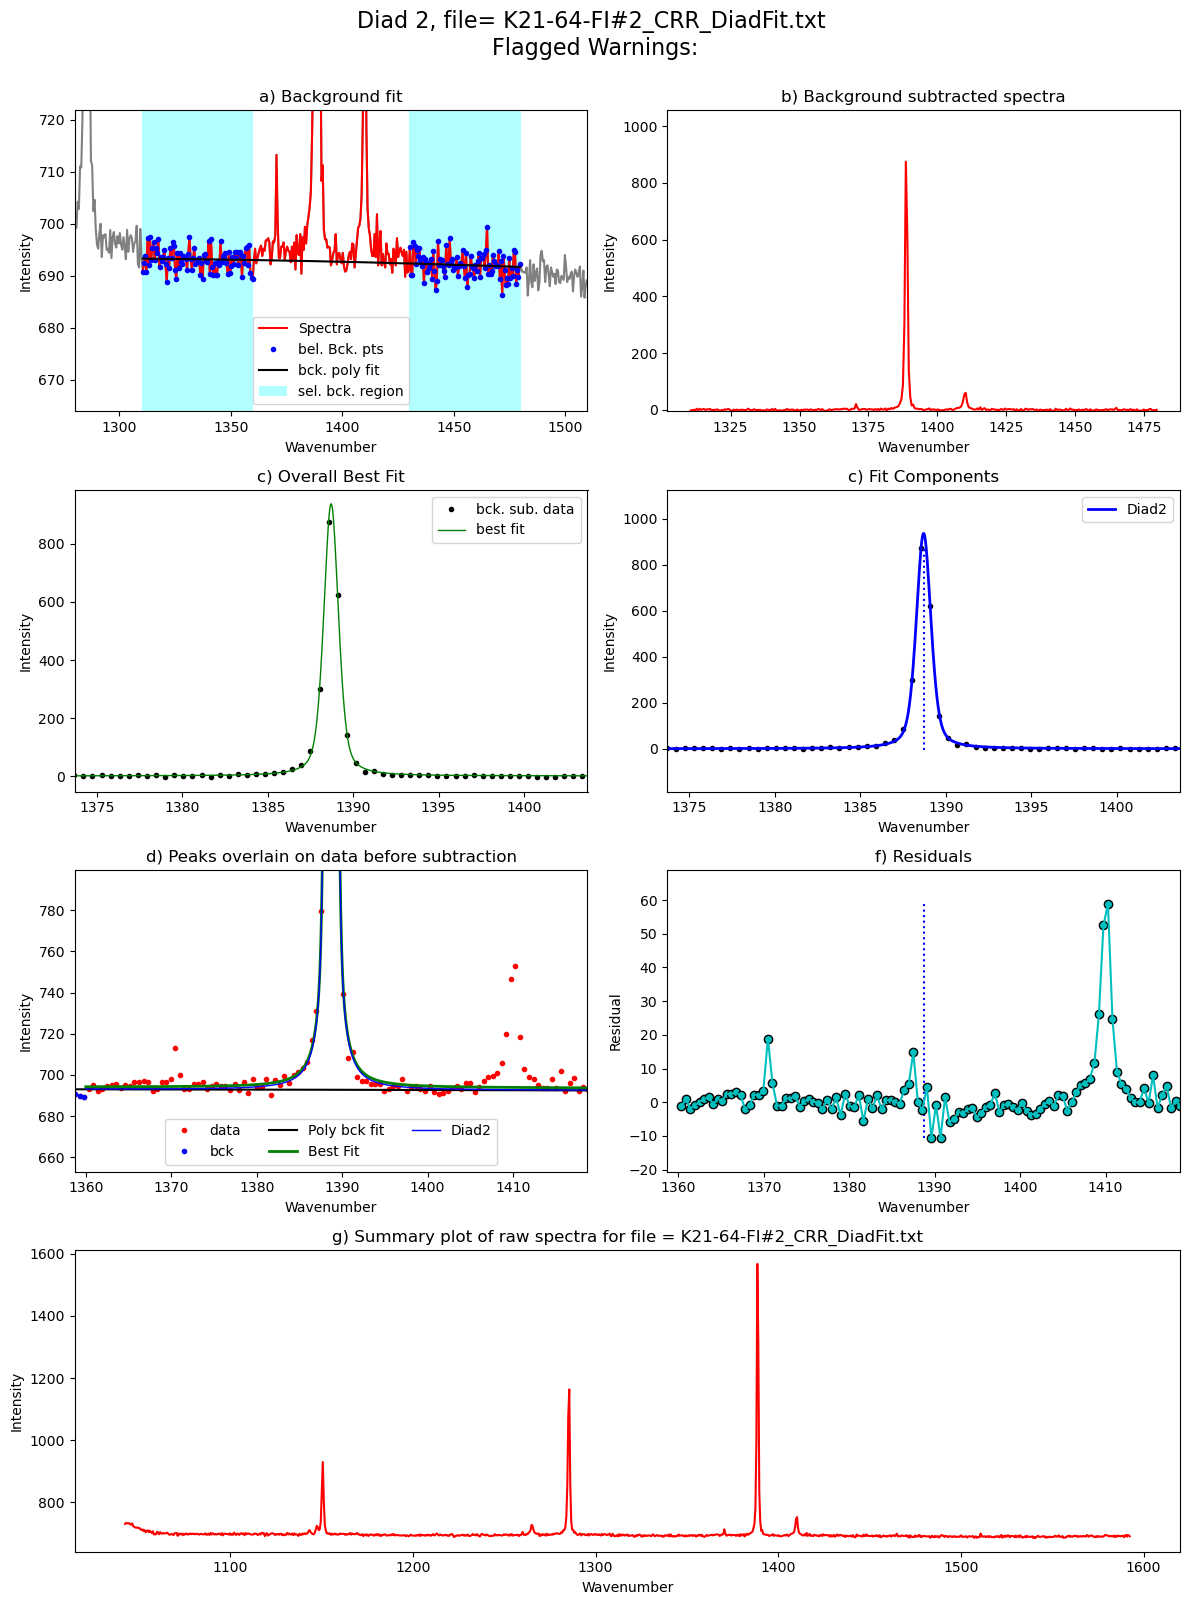

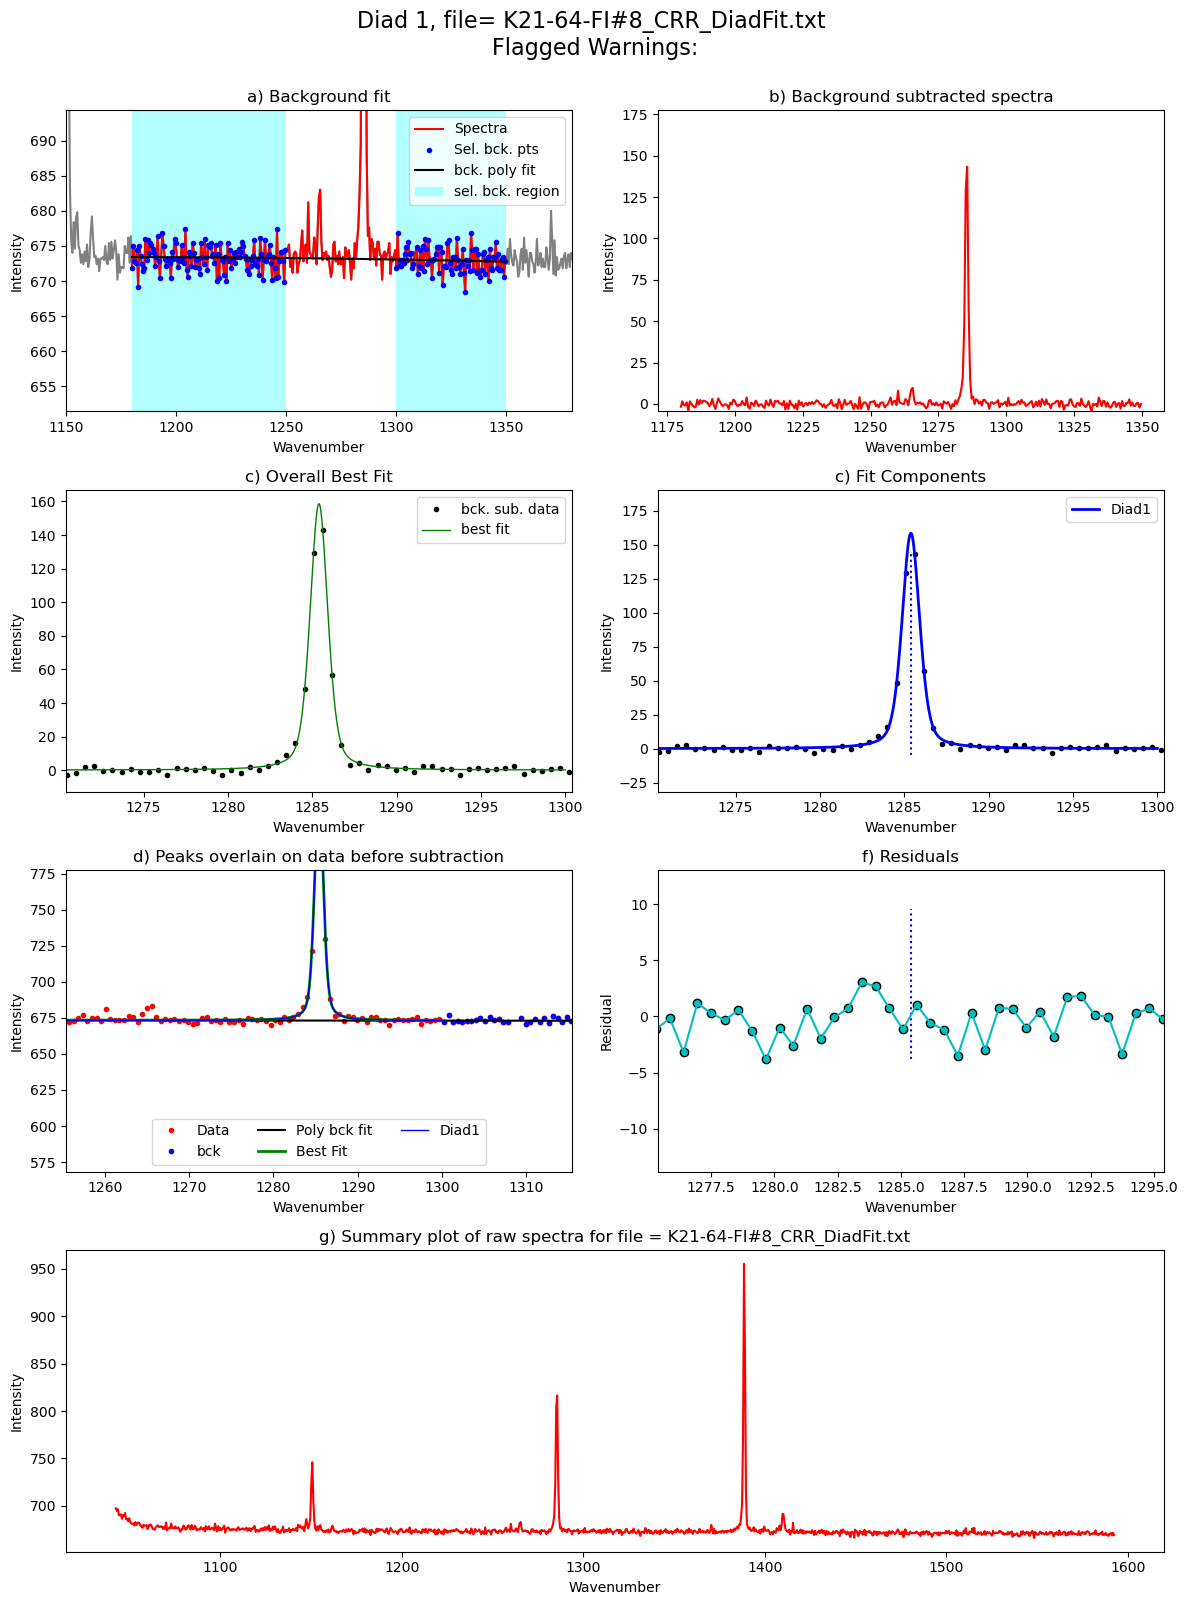

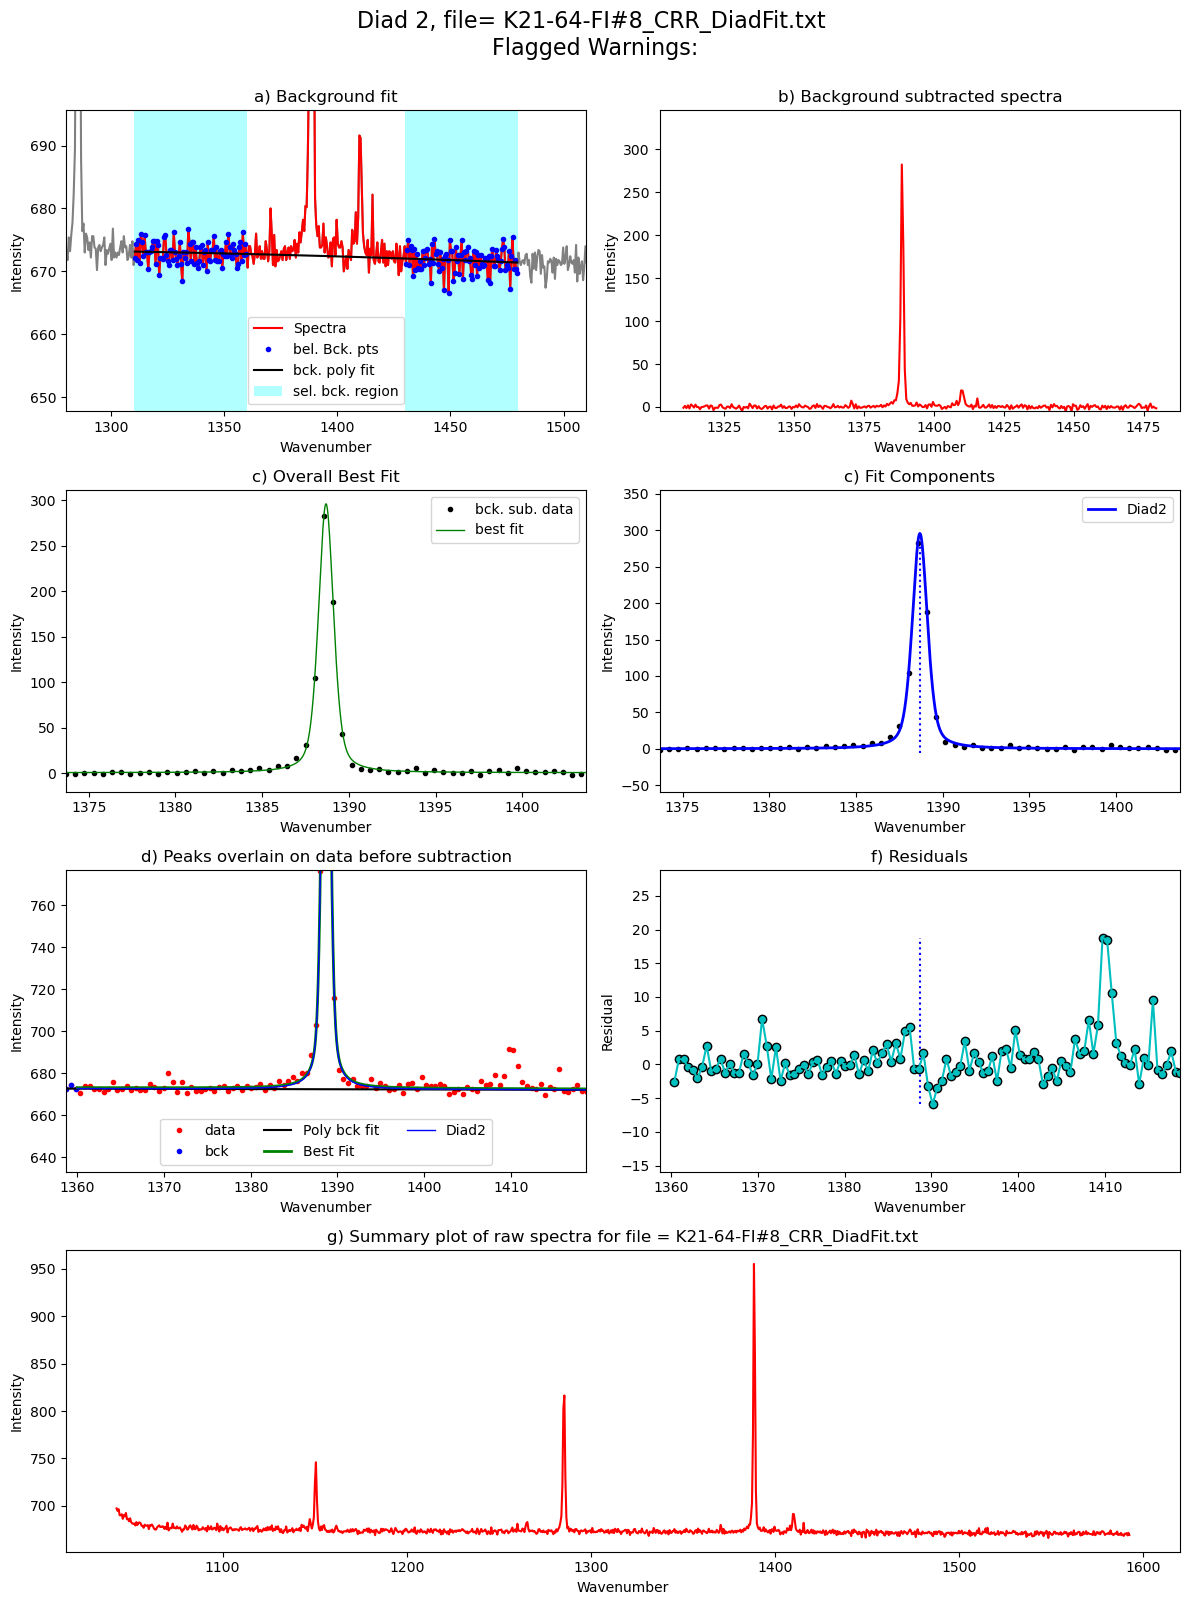

In [15]:
from tqdm import tqdm
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # If True, wont show figures in notebook, but will still save them in a folder 
Diad_Files_i=Diad_Files
df_Merge = pd.DataFrame([])
for i in tqdm(range(0, len(Diad_Files))): #
    
    # For diad1, config file like you had in the previous. 
    # Only really used to exclude a range (say your spectra has a known spec)
    diad_id_config=pf.diad_id_config(exclude_range1=[1308, 1309])
    
    # Here, the prominence are taken from the fitting in the last notebook
    diad1_fit_config2.HB_prom=GroupN_df['HB1_abs_prom'].iloc[i]
    diad1_fit_config2.diad_prom=GroupN_df['Diad1_abs_prom'].iloc[i]
    diad1_fit_config2.gauss_amp=2*GroupN_df['HB1_abs_prom'].iloc[i]

    Diad1_fit=pf.fit_diad_1_w_bck(config1=diad1_fit_config2,
    config2=diad_id_config, path=spectra_path, filename=GroupN_df['filename'].iloc[i],
    filetype=filetype, plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad1_pos'].iloc[i],
    HB_pos=GroupN_df['HB1_pos'].iloc[i])

    ## Same for diad2, just also has a C13 peak
    diad2_fit_config2.HB_prom=GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.diad_prom=GroupN_df['Diad2_abs_prom'].iloc[i]
    diad2_fit_config2.gauss_amp= 2*GroupN_df['HB2_abs_prom'].iloc[i]
    diad2_fit_config2.C13_prom=GroupN_df['C13_abs_prom'].iloc[i]
    
    
    Diad2_fit=pf.fit_diad_2_w_bck(config1=diad2_fit_config2,
        config2=diad_id_config,
    path=spectra_path, filename=GroupN_df['filename'].iloc[i], 
    filetype=filetype,
    plot_figure=plot_figure, close_figure=close_figure,
    Diad_pos=GroupN_df['Diad2_pos'].iloc[i],
    HB_pos=GroupN_df['HB2_pos'].iloc[i], 
    C13_pos=GroupN_df['C13_pos'].iloc[i])
    
    # This combines the outputs into a single dataframe
    data=pf.combine_diad_outputs(filename=GroupN_df['filename'].iloc[i], prefix=False, 
    Diad1_fit=Diad1_fit, path=spectra_path,                  
    Diad2_fit=Diad2_fit)        
    
 

    df_Merge = pd.concat([df_Merge, data], axis=0)


### Get file names that flagged a warning

In [16]:
refit_d1=(df_Merge['Diad1_refit']!='Flagged Warnings:')
refit_d2=(df_Merge['Diad2_refit']!='Flagged Warnings:')# (df_Merge['Diad2_refit']==True)
refit=refit_d1|refit_d2
print(sum(refit))
refit_names_1=df_Merge['filename'].loc[refit]
print(refit_names_1)

0
Series([], Name: filename, dtype: object)


### Have a look at different parameters
- This can help you spot really bad fits

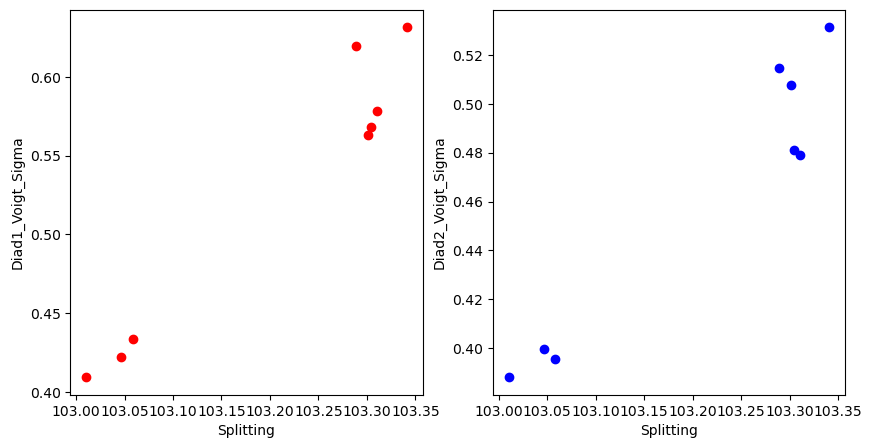

In [17]:
x='Splitting'
y1='Diad1_Voigt_Sigma'
y2='Diad2_Voigt_Sigma'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x], df_Merge[y1], 'or')
ax2.plot(df_Merge[x], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)
ax1.set_xlabel(x)
ax2.set_xlabel(x)
ax1.set_ylabel(y1)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

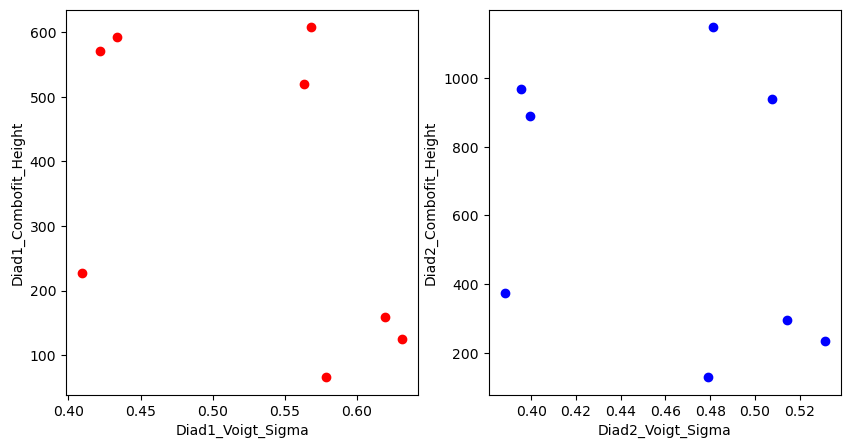

In [18]:
x1='Diad1_Voigt_Sigma'
x2='Diad2_Voigt_Sigma'
y1='Diad1_Combofit_Height'
y2='Diad2_Combofit_Height'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_Merge[x1], df_Merge[y1], 'or')
ax2.plot(df_Merge[x2], df_Merge[y2], 'ob')
ax1.plot(df_Merge[x1].loc[refit_d1], df_Merge[y1].loc[refit_d1], 'xk', ms=10)
ax2.plot(df_Merge[x2].loc[refit_d2], df_Merge[y2].loc[refit_d2], 'xk', ms=10)

ax1.set_xlabel(x1)
ax1.set_ylabel(y1)
ax2.set_xlabel(x2)
ax2.set_ylabel(y2)
df_not_too_Weak=df_Merge #.loc[(df_Merge['Diad1_Voigt_Area']>25) & (df_Merge['Diad2_Voigt_Area']>30)]

In [19]:
## Save parameters to excel

In [20]:
combo=df_Merge

if batch=='Weak':
    combo.to_excel('Weak_Diads.xlsx')
if batch=='Medium':
    combo.to_excel('Medium_Diads.xlsx')
if batch=='Strong':
    combo.to_excel('Strong_Diads.xlsx')

In [21]:
combo

filename   Splitting  Diad1_Combofit_Cent  \
0       K21-59-FI#1_CRR_DiadFit  103.058246          1286.035114   
0                   K21-59-FI#2  103.010689          1286.157463   
0       K21-59-FI#3_CRR_DiadFit  103.046333          1286.074091   
0  K21-61-FI#1-rep1_CRR_DiadFit  103.310206          1285.431901   
0  K21-61-FI#1-rep2_CRR_DiadFit  103.304614          1285.435763   
0       K21-63-FI#1_CRR_DiadFit  103.341050          1285.310758   
0       K21-64-FI#2_CRR_DiadFit  103.301001          1285.407637   
0       K21-64-FI#8_CRR_DiadFit  103.288880          1285.392843   

   Diad1_Combofit_Height  Diad1_Voigt_Cent  Diad1_Voigt_Area  \
0             592.273795       1286.035114        607.861450   
0             227.669921       1286.157463        201.585656   
0             570.408880       1286.074091        582.296696   
0              66.022125       1285.431901         82.081753   
0             607.809997       1285.435763        895.852963   
0             125.549942       1285.310758        210.735732   
0             519.608481       1285.407637        812.182813   
0             158.648119       1285.392843        249.598353   

   Diad1_Voigt_Sigma  Diad1_Residual  Diad1_Prop_Lor  Diad1_fwhm  ...  \
0           0.433738        3.691376    3.099471e-01    0.867475  ...   
0           0.409447        3.372069    4.144724e-02    0.818893  ...   
0           0.422212        3.767918    3.700721e-01    0.844424  ...   
0           0.578442        3.130956    1.160394e-07    1.156884  ...   
0           0.568252        3.891748    5.562908e-01    1.136503  ...   
0           0.631461        1.840531    6.219954e-01    1.262921  ...   
0           0.563376        3.854110    7.243915e-01    1.126752  ...   
0           0.619735        1.485895    5.025194e-01    1.239470  ...   

  HB2_Sigma  C13_Cent  C13_Area  C13_Sigma  Diad2_Gauss_Cent  \
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   
0       NaN       NaN       NaN        NaN               NaN   

   Diad2_Gauss_Area Diad2_Gauss_Sigma  Diad1_Gauss_Cent  Diad1_Gauss_Area  \
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   
0               NaN               NaN               NaN               NaN   

   Diad1_Gauss_Sigma  
0                NaN  
0                NaN  
0                NaN  
0                NaN  
0                NaN  
0                NaN  
0                NaN  
0                NaN  

[8 rows x 36 columns]